In [1]:
import pandas as pd ## Data Manuplation
import numpy as np ##  Numerical data processing
import matplotlib.pyplot as plt ## Visualizatoin
import seaborn as sns   ## Visualization
import datetime as dt ## Datetime manipulation
import re
import warnings
from ipywidgets import interact
warnings.filterwarnings('ignore')

pd.set_option('max.columns',None)

In [2]:
df = pd.read_csv('match_2008_2016.csv')

In [3]:
df.head()

,Match_Id,Match_Date,Season_Year,Venue_Name,City_Name,Toss_Winner,match_Winner,toss_decision,Win_Type,Outcome_Type,Player_Name,team1,team2,Win_Margin,man_of_the_match,Total_runs,MOS,Orange_Cap,Purple_Cap
0,335987,18-04-2008 00:00,2008,M Chinnaswamy Stadium,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,140,BB McCullum,268,SR Watson,SE Marsh,Sohail Tanvir
1,335988,19-04-2008 00:00,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,Kings XI Punjab,Chennai Super Kings,33,MEK Hussey,430,SR Watson,SE Marsh,Sohail Tanvir
2,335989,19-04-2008 00:00,2008,Feroz Shah Kotla,Delhi,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,Delhi Daredevils,Rajasthan Royals,9,MF Maharoof,240,SR Watson,SE Marsh,Sohail Tanvir
3,335990,20-04-2008 00:00,2008,Wankhede Stadium,Mumbai,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,5,MV Boucher,315,SR Watson,SE Marsh,Sohail Tanvir
4,335991,20-04-2008 00:00,2008,Eden Gardens,Kolkata,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,5,DJ Hussey,184,SR Watson,SE Marsh,Sohail Tanvir


In [4]:
def check_missing(df):
    temp = df.isnull().sum()*100/len(df)
    temp = temp[temp > 0].sort_values(ascending=False)
    temp = pd.DataFrame(temp,columns = ['per_missing'])
    return temp

In [5]:
check_missing(df)

,per_missing


In [6]:
df.shape

(574, 19)

In [7]:
df.columns

Index(['Match_Id', 'Match_Date', 'Season_Year', 'Venue_Name', 'City_Name',
       'Toss_Winner', 'match_Winner', 'toss_decision', 'Win_Type',
       'Outcome_Type', 'Player_Name', 'team1', 'team2', 'Win_Margin',
       'man_of_the_match', 'Total_runs', 'MOS', 'Orange_Cap', 'Purple_Cap'],
      dtype='object')

In [8]:
match_per_season = df.groupby(["Season_Year"])["Match_Id"].count().reset_index().rename(columns={"Match_Id":"matches"})
match_per_season

,Season_Year,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,72
4,2012,74
5,2013,76
6,2014,60
7,2015,57
8,2016,60


<AxesSubplot:xlabel='Season_Year', ylabel='count'>

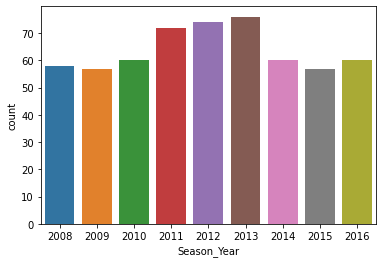

In [9]:
sns.countplot(df["Season_Year"])

In [10]:
df2 =  pd.read_csv('IPL_match_data_1.csv')

In [11]:
df2.head()

,id,season_year,match_date,inning_no,over,ball,striker,non_striker,bowler,runs_scored,extra_runs,total_runs,batting_team,bowling_team,MOS,Orange_Cap,Purple_Cap
0,335982,2008,18-04-2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
1,335982,2008,18-04-2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
2,335982,2008,18-04-2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
3,335982,2008,18-04-2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir
4,335982,2008,18-04-2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,SR Watson,SE Marsh,Sohail Tanvir


In [12]:
def check_missing(df2):
    temp = df2.isnull().sum()*100/len(df2)
    temp = temp[temp > 0].sort_values(ascending=False)
    temp = pd.DataFrame(temp,columns = ['per_missing'])
    return temp

In [13]:
check_missing(df2)

,per_missing
Orange_Cap,90.12012
Purple_Cap,90.12012


In [14]:
temp = check_missing(df2)
rm_cols = list(temp[temp.per_missing >= 50].index)

In [15]:
rm_cols

['Orange_Cap', 'Purple_Cap']

In [16]:
df2.drop(rm_cols,axis = 1,inplace=True)

In [17]:
check_missing(df2)

,per_missing


<AxesSubplot:xlabel='season_year'>

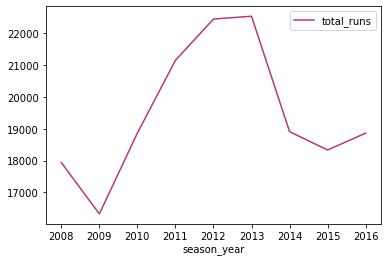

In [18]:
season = df2.groupby(["season_year"])["total_runs"].sum().reset_index()
p = season.set_index("season_year")
sns.lineplot(data=p,palette="magma")

In [19]:
season

,season_year,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862


In [20]:
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season["Runs scored per match"]=runs_per_season["total_runs"]/runs_per_season["matches"]
runs_per_season.set_index("Season_Year",inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season_Year,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,72,21154,293.805556
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,57,18332,321.614035
2016,60,18862,314.366667


<AxesSubplot:xlabel='Toss_Winner'>

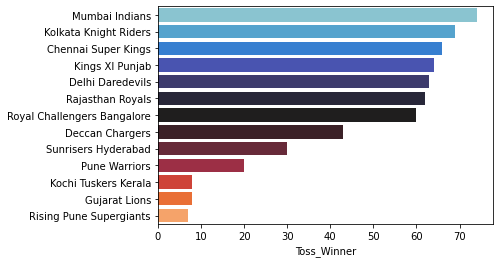

In [21]:
toss = df["Toss_Winner"].value_counts()
sns.barplot(y=toss.index, x=toss,orient="h",palette="icefire",saturation=1)

In [22]:
toss

Mumbai Indians                 74
Kolkata Knight Riders          69
Chennai Super Kings            66
Kings XI Punjab                64
Delhi Daredevils               63
Rajasthan Royals               62
Royal Challengers Bangalore    60
Deccan Chargers                43
Sunrisers Hyderabad            30
Pune Warriors                  20
Kochi Tuskers Kerala            8
Gujarat Lions                   8
Rising Pune Supergiants         7
Name: Toss_Winner, dtype: int64

<AxesSubplot:xlabel='Season_Year', ylabel='count'>

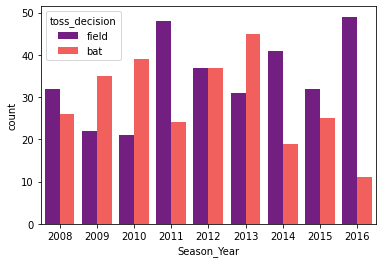

In [23]:
sns.countplot(x="Season_Year",hue="toss_decision",data=df,palette="magma",saturation=1)

In [24]:
#winner_choice = match_data.groupby(["toss_decision"])["toss_winner"].value_counts
winner_choice = df.groupby(["toss_decision"])["Toss_Winner"].count()
winner_choice

toss_decision
bat      261
field    313
Name: Toss_Winner, dtype: int64

In [25]:
df["Win_Type"].value_counts()

wickets    307
runs       261
Tie          6
Name: Win_Type, dtype: int64

In [26]:
df.Venue_Name[df.Win_Type != "runs"].mode()

0             Eden Gardens
1    M Chinnaswamy Stadium
dtype: object

In [27]:
df.Venue_Name[df.Win_Type  != "wickets"].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

In [28]:
df.Venue_Name[df.Toss_Winner=="Royal Challengers Bangalore"][df.match_Winner=="Royal Challengers Bangalore"].mode()

0    M Chinnaswamy Stadium
dtype: object

In [29]:
df.match_Winner[df.Win_Type!="runs"].mode()

0    Royal Challengers Bangalore
dtype: object

In [30]:
df.match_Winner[df.Win_Type!="Wickets"].mode()

0    Mumbai Indians
dtype: object

<AxesSubplot:ylabel='count'>

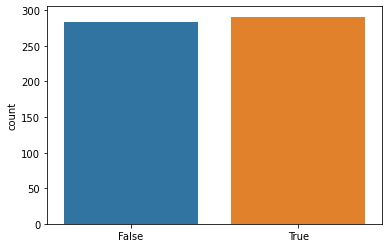

In [31]:
toss = df["Toss_Winner"] == df["match_Winner"]
sns.countplot(toss)

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

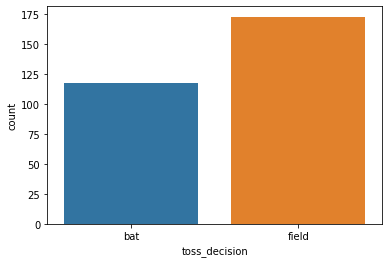

In [32]:
sns.countplot(df.toss_decision[df.Toss_Winner == df.match_Winner])

In [33]:
player = (df2["striker"]=="V Kohli")
df_Kohli=df2[player]
df_Kohli.head()

,id,season_year,match_date,inning_no,over,ball,striker,non_striker,bowler,runs_scored,extra_runs,total_runs,batting_team,bowling_team,MOS
211,335982,2008,18-04-2008,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
212,335982,2008,18-04-2008,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
213,335982,2008,18-04-2008,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
216,335982,2008,18-04-2008,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
217,335982,2008,18-04-2008,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson


In [34]:
df[df["Win_Margin"]==df["Win_Margin"].max()]

,Match_Id,Match_Date,Season_Year,Venue_Name,City_Name,Toss_Winner,match_Winner,toss_decision,Win_Type,Outcome_Type,Player_Name,team1,team2,Win_Margin,man_of_the_match,Total_runs,MOS,Orange_Cap,Purple_Cap
557,980992,14-05-2016 00:00,2016,M Chinnaswamy Stadium,Bangalore,Gujarat Lions,Royal Challengers Bangalore,field,runs,Result,AB de Villiers,Royal Challengers Bangalore,Gujarat Lions,144,AB de Villiers,332,V Kohli,V Kohli,B Kumar


In [35]:
df.head()

,Match_Id,Match_Date,Season_Year,Venue_Name,City_Name,Toss_Winner,match_Winner,toss_decision,Win_Type,Outcome_Type,Player_Name,team1,team2,Win_Margin,man_of_the_match,Total_runs,MOS,Orange_Cap,Purple_Cap
0,335987,18-04-2008 00:00,2008,M Chinnaswamy Stadium,Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,Royal Challengers Bangalore,Kolkata Knight Riders,140,BB McCullum,268,SR Watson,SE Marsh,Sohail Tanvir
1,335988,19-04-2008 00:00,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,Kings XI Punjab,Chennai Super Kings,33,MEK Hussey,430,SR Watson,SE Marsh,Sohail Tanvir
2,335989,19-04-2008 00:00,2008,Feroz Shah Kotla,Delhi,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,Delhi Daredevils,Rajasthan Royals,9,MF Maharoof,240,SR Watson,SE Marsh,Sohail Tanvir
3,335990,20-04-2008 00:00,2008,Wankhede Stadium,Mumbai,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,Mumbai Indians,Royal Challengers Bangalore,5,MV Boucher,315,SR Watson,SE Marsh,Sohail Tanvir
4,335991,20-04-2008 00:00,2008,Eden Gardens,Kolkata,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,Kolkata Knight Riders,Deccan Chargers,5,DJ Hussey,184,SR Watson,SE Marsh,Sohail Tanvir


In [36]:
RCB = (df2["batting_team"]=="Royal Challengers Bangalore")
df_RCB=df2[player]
df_RCB.head()

,id,season_year,match_date,inning_no,over,ball,striker,non_striker,bowler,runs_scored,extra_runs,total_runs,batting_team,bowling_team,MOS
211,335982,2008,18-04-2008,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
212,335982,2008,18-04-2008,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
213,335982,2008,18-04-2008,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
216,335982,2008,18-04-2008,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson
217,335982,2008,18-04-2008,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,SR Watson


In [37]:
match_stats = pd.read_csv('IPL_Match_Project.csv')

In [38]:
match_stats.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


## Player Analysis

In [39]:
player = (match_stats["Striker"]=="MS Dhoni")
MS_Dhoni=match_stats[player]
MS_Dhoni.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
164,335988,2008,7,3,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
167,335988,2008,7,6,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
168,335988,2008,8,1,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,JR Hopes,NaN,NaN,0.0,lbw,MS Dhoni,NaN,"Punjab Cricket Association Stadium, Mohali"
950,335994,2008,16,1,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,wides,1.0,NaN,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
951,335994,2008,16,2,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,NaN,NaN,4.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"


In [40]:
bat = match_stats.groupby(['Striker']).agg({'Ball_Id' : lambda x: x.count(),
                                                'runs_by_batsman':lambda x: x.sum(),
                                                 'Kind_Out':lambda x:x.count()})

In [41]:
bat = match_stats.groupby(['Striker']).agg({'Ball_Id' : lambda x: x.count(),
                                                'runs_by_batsman':lambda x: x.sum(),
                                                 'Kind_Out':lambda x:x.count()})
bat=pd.DataFrame(bat)
print("Type of our data :",type(bat))
bat=bat.sort_values(['runs_by_batsman','Ball_Id'],ascending=[False,False])
bat=bat.head(50)
bat.head()

Type of our data : <class 'pandas.core.frame.DataFrame'>


,Ball_Id,runs_by_batsman,Kind_Out
Striker,,,
SK Raina,3059,4106.0,122
V Kohli,3237,4105.0,115
RG Sharma,2996,3874.0,121
G Gambhir,3028,3634.0,117
CH Gayle,2359,3447.0,81


In [42]:
avg_run = bat['runs_by_batsman']/bat['Kind_Out']

In [43]:
bat['avg_of_batsman'] = avg_run

In [44]:
bat

,Ball_Id,runs_by_batsman,Kind_Out,avg_of_batsman
Striker,,,,
SK Raina,3059,4106.0,122,33.655738
V Kohli,3237,4105.0,115,35.695652
RG Sharma,2996,3874.0,121,32.016529
G Gambhir,3028,3634.0,117,31.059829
CH Gayle,2359,3447.0,81,42.555556
RV Uthappa,2721,3390.0,119,28.487395
DA Warner,2440,3373.0,91,37.065934
MS Dhoni,2419,3270.0,92,35.543478
AB de Villiers,2231,3270.0,78,41.923077


In [45]:
strike_rate = bat['runs_by_batsman']*100/bat['Ball_Id']

In [46]:
bat["strike_rate"]=strike_rate
bat.head()

,Ball_Id,runs_by_batsman,Kind_Out,avg_of_batsman,strike_rate
Striker,,,,,
SK Raina,3059,4106.0,122,33.655738,134.226872
V Kohli,3237,4105.0,115,35.695652,126.814952
RG Sharma,2996,3874.0,121,32.016529,129.305741
G Gambhir,3028,3634.0,117,31.059829,120.013210
CH Gayle,2359,3447.0,81,42.555556,146.121238


In [47]:
bat.rename(columns={'Ball_Id':'total_bals_played','runs_by_batsman':'total_runs','Kind_Out':'times_dismissal'},inplace=True)
bat.head()
bat.to_csv(r'C:\Users\Acer\OneDrive\Desktop\bat.csv')

In [48]:
bat=pd.read_csv('bat.csv')
bat.head(50)

,Striker,total_bals_played,total_runs,times_dismissal,avg_of_batsman,strike_rate
0,SK Raina,3059,4106.0,122,33.655738,134.226872
1,V Kohli,3237,4105.0,115,35.695652,126.814952
2,RG Sharma,2996,3874.0,121,32.016529,129.305741
3,G Gambhir,3028,3634.0,117,31.059829,120.013210
4,CH Gayle,2359,3447.0,81,42.555556,146.121238
5,RV Uthappa,2721,3390.0,119,28.487395,124.586549
6,DA Warner,2440,3373.0,91,37.065934,138.237705
7,MS Dhoni,2419,3270.0,92,35.543478,135.179826
8,AB de Villiers,2231,3270.0,78,41.923077,146.571044
9,S Dhawan,2622,3082.0,95,32.442105,117.543860


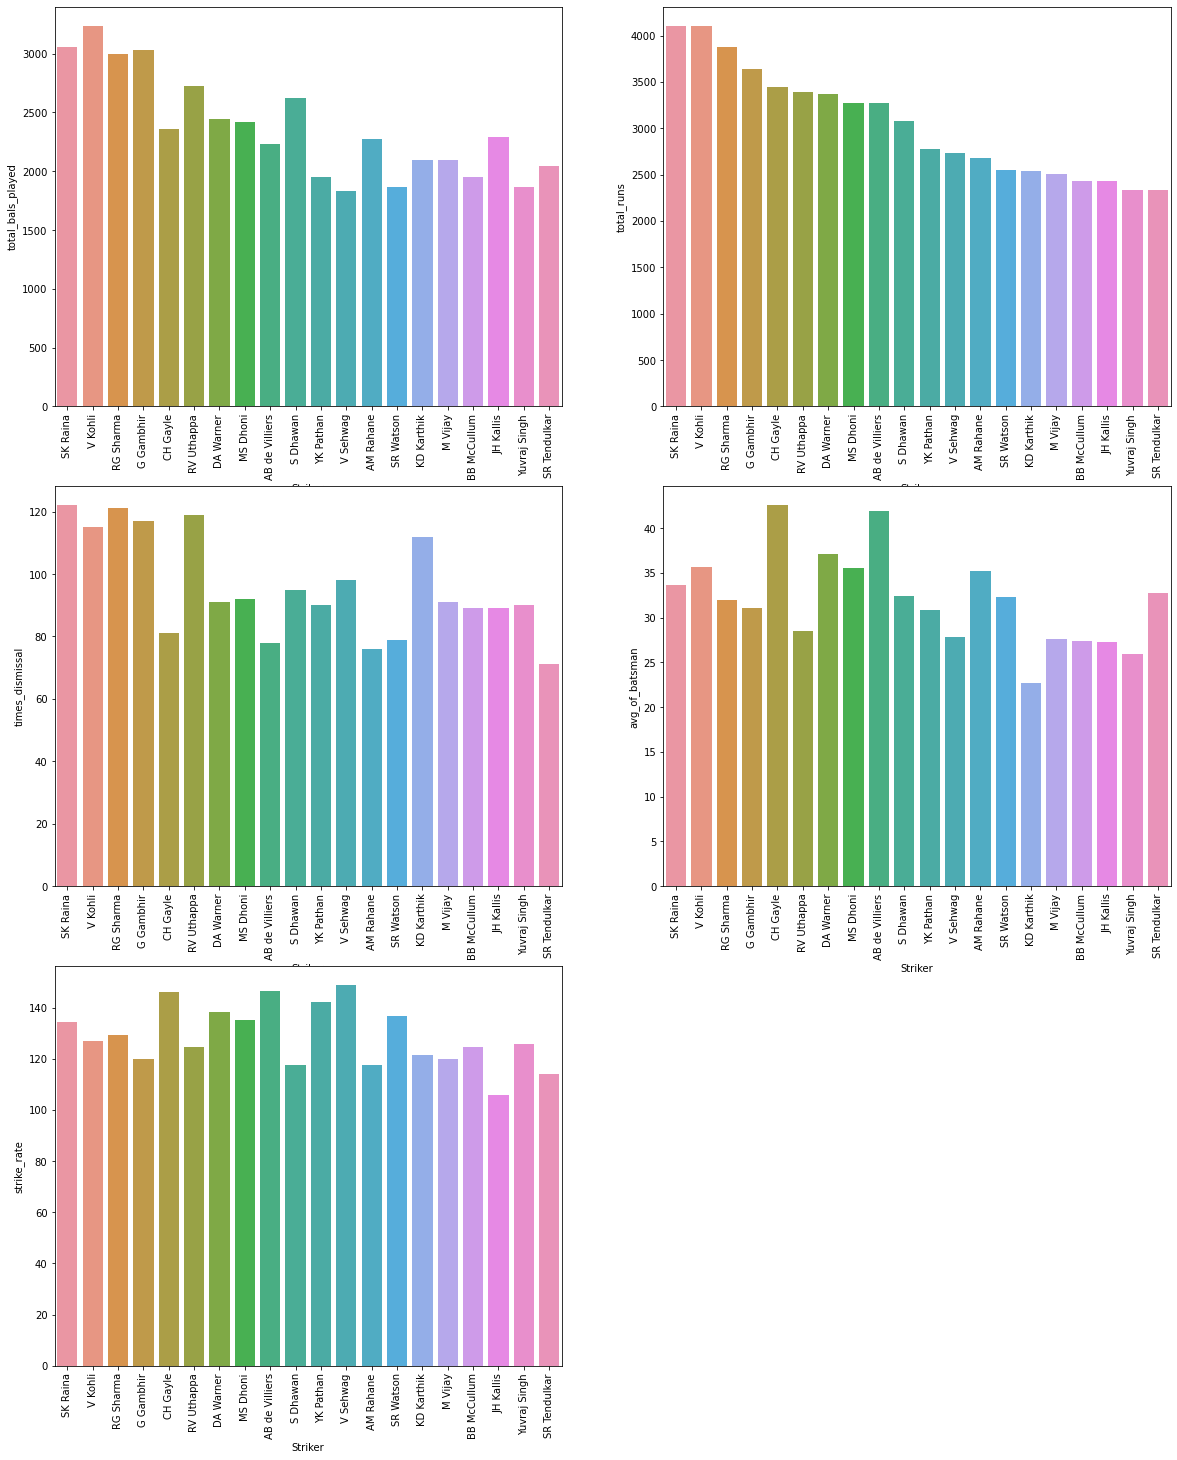

In [49]:
plt.figure(figsize=(20,25))
col = [bat['total_bals_played'],bat['total_runs'],bat['times_dismissal'],bat['avg_of_batsman'],bat['strike_rate']]
c=1
for i in col:    
    plt.subplot(3,2,c)
    sns.barplot(x=bat['Striker'],y=i)
    plt.xticks(rotation=90)
    c+=1
plt.show()

In [50]:
match_stats['runs_by_batsman'].unique()

array([ 0., nan,  4.,  6.,  1.,  2.,  5.,  3.])

In [51]:
six_four=match_stats.loc[(match_stats['runs_by_batsman'] ==4) | (match_stats['runs_by_batsman'] ==6) ]

In [52]:
sixs = six_four.loc[six_four['runs_by_batsman']==6]
sixs = sixs.groupby(['Striker']).agg({'runs_by_batsman': lambda x:x.count()})
sixs = sixs.sort_values("runs_by_batsman",axis=0,ascending=False)

In [53]:
sixs.head()

,runs_by_batsman
Striker,
CH Gayle,252
RG Sharma,164
SK Raina,161
V Kohli,148
YK Pathan,143


In [54]:
sixs.to_csv(r'C:\Users\Acer\OneDrive\Desktop\season_six.csv')

In [58]:
sixs=pd.read_csv('season_six.csv')

In [56]:
sixs.head(20)

,Striker,runs_by_batsman
0,CH Gayle,252
1,RG Sharma,164
2,SK Raina,161
3,V Kohli,148
4,YK Pathan,143
5,AB de Villiers,142
6,MS Dhoni,140
7,DA Warner,134
8,Yuvraj Singh,133
9,KA Pollard,125


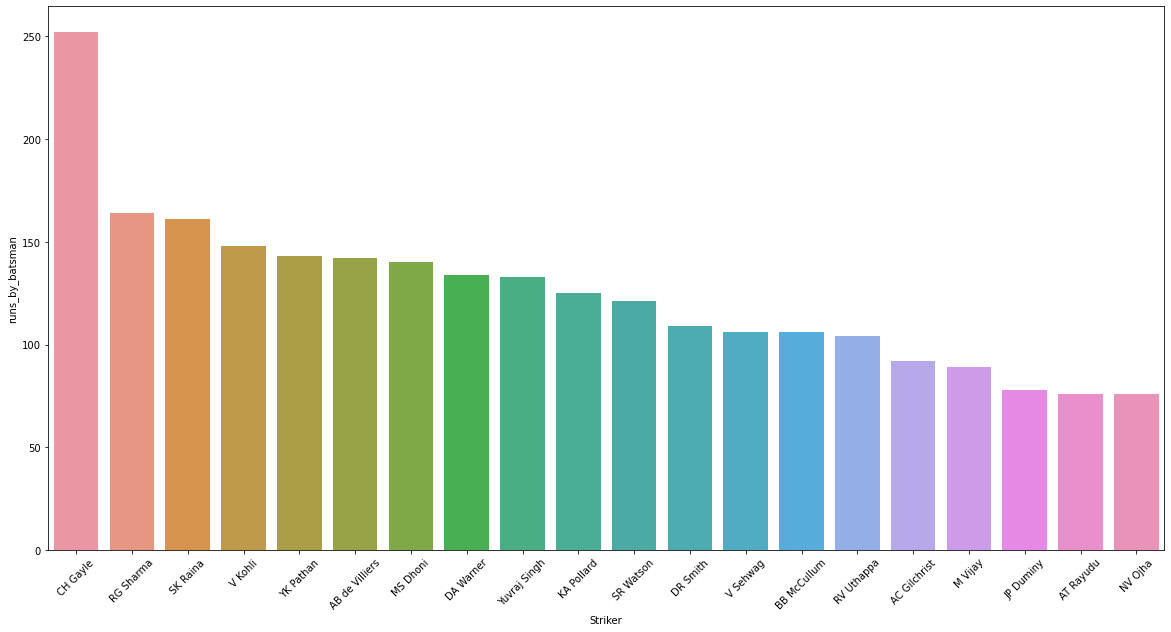

In [60]:
sixs=sixs.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=sixs['Striker'],y=sixs['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [61]:
temp=match_stats.loc[(match_stats['Over_Id']>=1) & (match_stats['Over_Id']<=6) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temp))
print(temp.shape)

<class 'pandas.core.frame.DataFrame'>
(1135, 1)


In [62]:
temp.head()

runs_by_batsman
                                    sum
Over_Id Striker                        
1       A Chopra                    2.0
        A Mukund                    1.0
        AA Jhunjhunwala             0.0
        AB Barath                   1.0
        AB McDonald                 1.0

In [63]:
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)

In [64]:
temp

runs_by_batsman
                                sum
Over_Id Striker                    
5       G Gambhir             373.0
2       G Gambhir             358.0
3       CH Gayle              350.0
        G Gambhir             337.0
4       G Gambhir             336.0
...                             ...
6       P Negi                  0.0
2       R Ashwin                0.0
        R McLaren               0.0
        RA Jadeja               0.0
4       DJ Thornely             0.0

[1135 rows x 1 columns]

In [65]:
mean_power = temp[('runs_by_batsman','sum')].mean()

In [66]:
mean_power

42.309251101321586

In [67]:
temp = temp.loc[(temp[('runs_by_batsman','sum')]>mean_power)]

In [68]:
temp

runs_by_batsman
                                sum
Over_Id Striker                    
5       G Gambhir             373.0
2       G Gambhir             358.0
3       CH Gayle              350.0
        G Gambhir             337.0
4       G Gambhir             336.0
...                             ...
3       S Sohal                44.0
1       AC Blizzard            44.0
4       LRPL Taylor            43.0
2       SA Asnodkar            43.0
6       KL Rahul               43.0

[308 rows x 1 columns]

In [69]:
temp.shape

(308, 1)

In [70]:
power_play = temp.head(20)

In [71]:
power_play

runs_by_batsman
                                 sum
Over_Id Striker                     
5       G Gambhir              373.0
2       G Gambhir              358.0
3       CH Gayle               350.0
        G Gambhir              337.0
4       G Gambhir              336.0
3       M Vijay                332.0
6       SK Raina               331.0
2       DA Warner              320.0
1       V Sehwag               310.0
3       S Dhawan               309.0
        V Sehwag               306.0
2       V Sehwag               305.0
        CH Gayle               301.0
5       DA Warner              300.0
3       BB McCullum            291.0
5       CH Gayle               290.0
3       DA Warner              289.0
5       SK Raina               288.0
1       AC Gilchrist           285.0
4       RV Uthappa             284.0

In [72]:
temp=match_stats.loc[(match_stats['Over_Id']>=6) & (match_stats['Over_Id']<15) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temp))
print(temp.shape)
temp.head()

<class 'pandas.core.frame.DataFrame'>
(2104, 1)


runs_by_batsman
                                   sum
Over_Id Striker                       
6       A Ashish Reddy             5.0
        A Chopra                   9.0
        A Flintoff                 0.0
        A Mishra                   1.0
        A Mukund                   4.0

In [73]:
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)

In [74]:
temp

runs_by_batsman
                                sum
Over_Id Striker                    
6       SK Raina              331.0
        G Gambhir             276.0
11      SK Raina              271.0
8       SK Raina              271.0
9       SK Raina              270.0
...                             ...
12      SB Joshi                0.0
9       F Behardien             0.0
6       P Negi                  0.0
7       MR Marsh                0.0
10      AA Bilakhia             0.0

[2104 rows x 1 columns]

In [75]:
mean_middle = temp[('runs_by_batsman','sum')].mean()
print(mean_middle)

34.56368821292776


In [76]:
temp = temp.loc[(temp[('runs_by_batsman','sum')]>mean_middle)]

In [77]:
temp

runs_by_batsman
                                    sum
Over_Id Striker                        
6       SK Raina                  331.0
        G Gambhir                 276.0
11      SK Raina                  271.0
8       SK Raina                  271.0
9       SK Raina                  270.0
...                                 ...
6       KK Nair                    35.0
10      Y Venugopal Rao            35.0
14      ML Hayden                  35.0
9       KA Pollard                 35.0
8       JR Hopes                   35.0

[595 rows x 1 columns]

In [78]:
middle_order = temp.head(20)

In [79]:
middle_order

runs_by_batsman
                               sum
Over_Id Striker                   
6       SK Raina             331.0
        G Gambhir            276.0
11      SK Raina             271.0
8       SK Raina             271.0
9       SK Raina             270.0
13      RG Sharma            262.0
12      V Kohli              261.0
14      SK Raina             261.0
12      RG Sharma            260.0
10      SK Raina             259.0
11      V Kohli              257.0
8       V Kohli              256.0
13      SK Raina             253.0
6       DA Warner            251.0
12      SK Raina             249.0
14      RG Sharma            248.0
        KD Karthik           245.0
13      YK Pathan            245.0
10      V Kohli              243.0
9       V Kohli              242.0

In [80]:
temp=match_stats.loc[(match_stats['Over_Id']>=16) & (match_stats['Over_Id']<=20) ]
temp = temp.groupby(['Over_Id','Striker']).agg({'runs_by_batsman':['sum']})
print(type(temp))
print(temp.shape)
temp.head()

<class 'pandas.core.frame.DataFrame'>
(1555, 1)


runs_by_batsman
                                   sum
Over_Id Striker                       
16      A Ashish Reddy            22.0
        A Chopra                   1.0
        A Flintoff                 3.0
        A Kumble                   5.0
        A Mishra                  15.0

In [81]:
temp = temp.sort_values(by=[('runs_by_batsman', 'sum')],ascending=False)
temp.head()

,,runs_by_batsman
,,sum
Over_Id,Striker,
17,MS Dhoni,412.0
20,MS Dhoni,405.0
18,MS Dhoni,392.0
19,MS Dhoni,366.0
16,MS Dhoni,333.0


In [82]:
finisher = temp.head(20)

In [83]:
finisher

runs_by_batsman
                                   sum
Over_Id Striker                       
17      MS Dhoni                 412.0
20      MS Dhoni                 405.0
18      MS Dhoni                 392.0
19      MS Dhoni                 366.0
16      MS Dhoni                 333.0
17      RG Sharma                310.0
        KA Pollard               292.0
16      AB de Villiers           290.0
18      KA Pollard               269.0
16      Yuvraj Singh             263.0
        V Kohli                  261.0
18      AB de Villiers           253.0
19      AB de Villiers           250.0
16      RG Sharma                249.0
18      RG Sharma                247.0
        JP Duminy                243.0
17      AB de Villiers           242.0
        YK Pathan                234.0
16      YK Pathan                228.0
19      KA Pollard               226.0

In [84]:
match_stats.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [85]:
player = (match_stats["Striker"]=="MS Dhoni")
MS_Dhoni=match_stats[player]
MS_Dhoni

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
164,335988,2008,7,3,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
167,335988,2008,7,6,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
168,335988,2008,8,1,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,JR Hopes,NaN,NaN,0.0,lbw,MS Dhoni,NaN,"Punjab Cricket Association Stadium, Mohali"
950,335994,2008,16,1,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,wides,1.0,NaN,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
951,335994,2008,16,2,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,NaN,NaN,4.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135695,981010,2016,20,3,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,6.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
135696,981010,2016,20,4,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,0.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
135697,981010,2016,20,5,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,4.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
135698,981010,2016,20,6,2,Rising Pune Supergiants,Kings XI Punjab,Mohammad Hafeez,MS Dhoni,R Ashwin,AR Patel,NaN,NaN,6.0,NaN,NaN,NaN,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...


In [86]:
MS_Dhoni['Kind_Out'].unique()

array([nan, 'lbw', 'run out', 'caught', 'caught and bowled', 'bowled',
       'stumped'], dtype=object)

<AxesSubplot:ylabel='Kind_Out'>

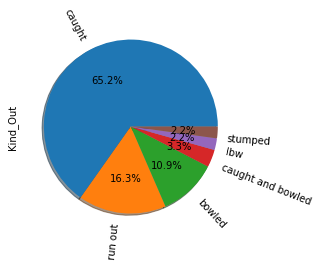

In [87]:
MS_Dhoni["Kind_Out"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,rotatelabels=True)

In [88]:
MS_Dhoni.to_csv(r'C:\Users\Acer\OneDrive\Desktop\MS_Dhoni.csv')

In [89]:
player = (match_stats["Striker"]=="SK Raina")
SK_Raina=match_stats[player]
SK_Raina

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
169,335988,2008,8,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
172,335988,2008,8,5,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,6.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
173,335988,2008,8,6,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
175,335988,2008,9,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,4.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
176,335988,2008,9,3,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135772,981012,2016,12,5,2,Gujarat Lions,Mumbai Indians,BB McCullum,SK Raina,DR Smith,Harbhajan Singh,NaN,NaN,1.0,NaN,NaN,NaN,Green Park
135775,981012,2016,13,2,2,Gujarat Lions,Mumbai Indians,BB McCullum,SK Raina,DR Smith,JJ Bumrah,NaN,NaN,0.0,caught,SK Raina,JC Buttler,Green Park
136531,419126,2010,1,3,3,Chennai Super Kings,Kings XI Punjab,RT Ponting,SK Raina,JA Morkel,J Theron,NaN,NaN,2.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
136532,419126,2010,1,4,3,Chennai Super Kings,Kings XI Punjab,RT Ponting,SK Raina,JA Morkel,J Theron,NaN,NaN,6.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"


<AxesSubplot:ylabel='Kind_Out'>

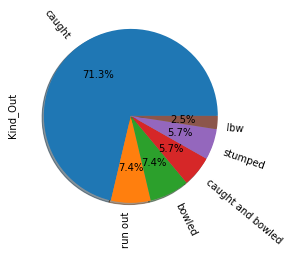

In [90]:
SK_Raina["Kind_Out"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,rotatelabels=True)

In [91]:
SK_Raina.to_csv(r'C:\Users\Acer\OneDrive\Desktop\SK_Raina.csv')

In [92]:
caps = pd.read_csv('IPL_caps.csv')

In [93]:
caps

,Season_Id,Season_Year,Man_of_the_Series,Orange_Cap,Purple_Cap
0,1,2008,SR Watson,SE Marsh,Sohail Tanvir
1,2,2009,AC Gilchrist,ML Hayden,RP Singh
2,3,2010,SR Tendulkar,SR Tendulkar,PP Ojha
3,4,2011,CH Gayle,CH Gayle,SL Malinga
4,5,2012,SP Narine,CH Gayle,M Morkel
5,6,2013,SR Watson,MEK Hussey,DJ Bravo
6,7,2014,GJ Maxwell,RV Uthappa,MM Sharma
7,8,2015,AD Russell,DA Warner,DJ Bravo
8,9,2016,V Kohli,V Kohli,B Kumar


In [94]:
temp=match_stats.loc[(match_stats['Over_Id']>=1) & (match_stats['Over_Id']<6) ]
temp = temp.groupby(['Over_Id','bowler']).agg({'Kind_Out':['count']})

In [95]:
temp

Kind_Out
                      count
Over_Id bowler             
1       A Chandila        5
        A Kumble          2
        A Mishra          1
        A Nehra           6
        A Singh           2
...                     ...
5       WPUJC Vaas        3
        YA Abdulla        5
        YK Pathan         2
        YS Chahal         2
        Z Khan            8

[868 rows x 1 columns]

In [96]:
temp.to_csv(r'C:\Users\Acer\OneDrive\Desktop\temp.csv')

In [97]:
kind_out = pd.read_csv("wickets.csv")

In [98]:
kind_out

,Over_Id,bowler,Kind_Out
0,1,A Chandila,5
1,1,A Kumble,2
2,1,A Mishra,1
3,1,A Nehra,6
4,1,A Singh,2
...,...,...,...
863,5,WPUJC Vaas,3
864,5,YA Abdulla,5
865,5,YK Pathan,2
866,5,YS Chahal,2


In [99]:
Wickets = kind_out.groupby(["bowler"])["Kind_Out"].sum().reset_index()

In [100]:
Wickets

,bowler,Kind_Out
0,A Chandila,10
1,A Flintoff,0
2,A Kumble,2
3,A Mishra,6
4,A Mithun,1
...,...,...
250,Y Venugopal Rao,1
251,YA Abdulla,5
252,YK Pathan,12
253,YS Chahal,4


In [101]:
kind_out = Wickets.sort_values(["Kind_Out"],ascending = False)

In [102]:
wicket = kind_out.head(50)

In [103]:
wicket

,bowler,Kind_Out
254,Z Khan,49
5,A Nehra,40
162,P Kumar,37
71,DS Kulkarni,34
38,B Kumar,33
15,AB Dinda,33
85,I Sharma,32
188,RP Singh,32
87,IK Pathan,31
73,DW Steyn,30


In [104]:
MS_dhoni1 = pd.read_csv("MS_Dhoni.csv")

In [105]:
MS_dhoni1.head()

,Unnamed: 0,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,164,335988,2008,7,3,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
1,167,335988,2008,7,6,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2,168,335988,2008,8,1,1,Chennai Super Kings,Kings XI Punjab,DJ Hussey,MS Dhoni,MEK Hussey,JR Hopes,NaN,NaN,0.0,lbw,MS Dhoni,NaN,"Punjab Cricket Association Stadium, Mohali"
3,950,335994,2008,16,1,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,wides,1.0,NaN,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"
4,951,335994,2008,16,2,1,Chennai Super Kings,Mumbai Indians,Mohammad Hafeez,MS Dhoni,ML Hayden,DJ Bravo,NaN,NaN,4.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"


In [106]:
MS1= MS_dhoni1.groupby(["bowler"])["Kind_Out"].count().reset_index()

In [107]:
MS1

,bowler,Kind_Out
0,A Ashish Reddy,2
1,A Kumble,0
2,A Mishra,0
3,A Mithun,0
4,A Nehra,3
...,...,...
174,Y Venugopal Rao,0
175,YK Pathan,1
176,YS Chahal,1
177,Yuvraj Singh,0


In [108]:
kind_out = MS1.sort_values(["Kind_Out"],ascending = False)

In [109]:
MS_Dhoni=kind_out.head(20)

In [110]:
MS_Dhoni

,bowler,Kind_Out
178,Z Khan,7
113,PP Ojha,7
4,A Nehra,3
75,KA Pollard,3
41,DP Nannes,2
150,SR Watson,2
147,SL Malinga,2
125,RE van der Merwe,2
117,R Bhatia,2
83,L Balaji,2


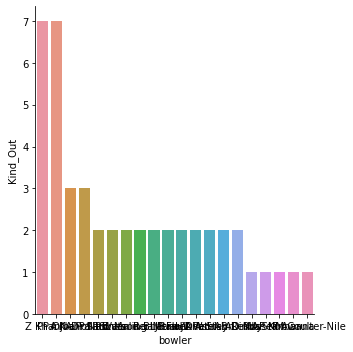

In [111]:
sns.catplot(x="bowler", y="Kind_Out", kind="bar", data=MS_Dhoni)

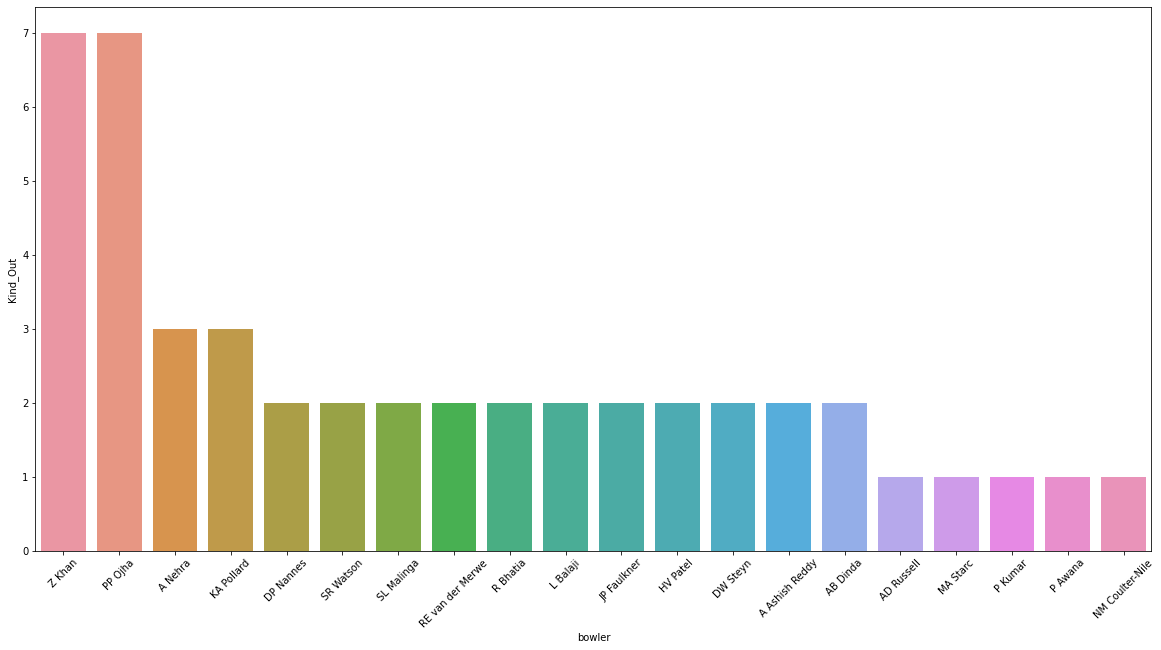

In [112]:
MS_Dhoni=MS_Dhoni.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=MS_Dhoni['bowler'],y=MS_Dhoni['Kind_Out'])
plt.xticks(rotation=45)
plt.show()

In [113]:
SK_Raina = pd.read_csv("SK_Raina.csv")

In [114]:
SK_Raina.head()

,Unnamed: 0,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,169,335988,2008,8,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
1,172,335988,2008,8,5,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,6.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2,173,335988,2008,8,6,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,JR Hopes,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
3,175,335988,2008,9,2,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,4.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
4,176,335988,2008,9,3,1,Chennai Super Kings,Kings XI Punjab,Mohammad Hafeez,SK Raina,MEK Hussey,IK Pathan,NaN,NaN,1.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"


In [115]:
Wickets_SK_Raina= SK_Raina.groupby(["bowler"])["Kind_Out"].count().reset_index()

In [116]:
kind_out = Wickets_SK_Raina.sort_values(["Kind_Out"],ascending = False)

In [117]:
SK_Rain = kind_out.head(20)

In [118]:
SK_Rain

,bowler,Kind_Out
121,PP Chawla,4
37,DJ Bravo,4
55,Harbhajan Singh,4
33,CH Morris,3
2,A Mishra,3
115,P Kumar,3
185,YS Chahal,3
184,YK Pathan,3
25,B Kumar,3
153,SK Warne,3


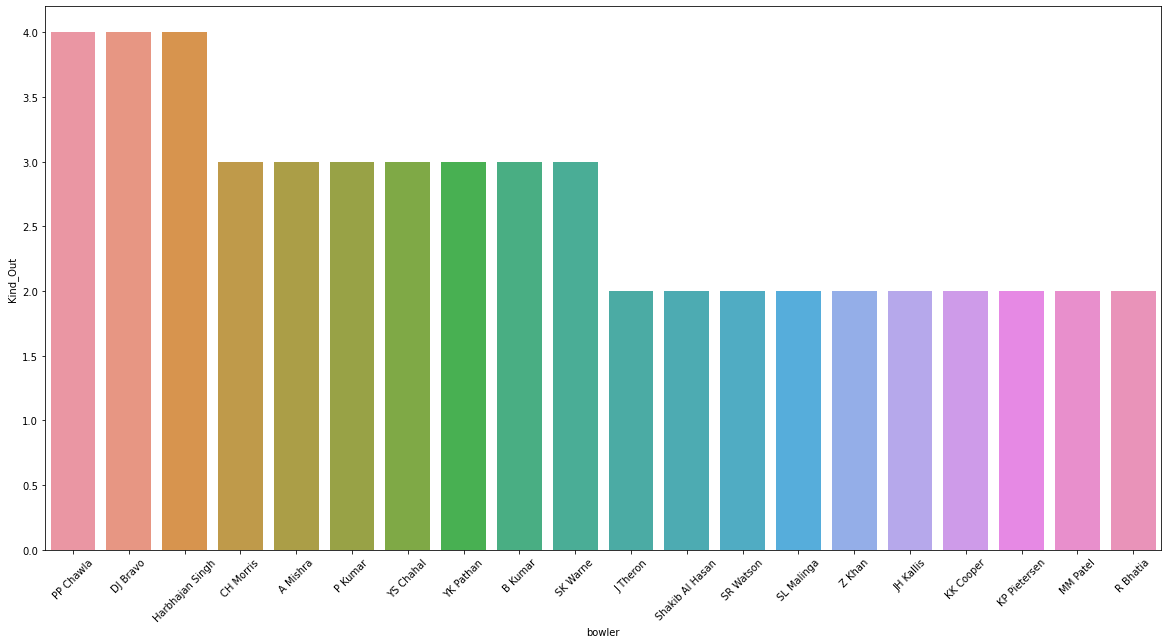

In [119]:
SK_Rain=SK_Rain.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=SK_Rain['bowler'],y=SK_Rain['Kind_Out'])
plt.xticks(rotation=45)
plt.show()

In [120]:
Match_data = pd.read_csv("IPL_Project 1.csv")

In [121]:
Match_data

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136585,729320,2014,1,6,4,Rajasthan Royals,Kolkata Knight Riders,BB McCullum,SPD Smith,SR Watson,SP Narine,NaN,NaN,2.0,NaN,NaN,NaN,Sheikh Zayed Stadium
136586,829746,2015,1,1,4,Rajasthan Royals,Kings XI Punjab,SC Ganguly,SR Watson,JP Faulkner,MG Johnson,NaN,NaN,0.0,bowled,SR Watson,NaN,"Sardar Patel Stadium, Motera"
136587,829746,2015,1,2,4,Rajasthan Royals,Kings XI Punjab,BB McCullum,SPD Smith,JP Faulkner,MG Johnson,noballs,1.0,4.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"
136588,829746,2015,1,3,4,Rajasthan Royals,Kings XI Punjab,BB McCullum,SPD Smith,JP Faulkner,MG Johnson,NaN,NaN,1.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"


In [122]:
player = (Match_data["Striker"]=="RA Jadeja")
RA_Jadej=Match_data[player]
RA_Jadej

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
295,335989,2008,8,5,1,Rajasthan Royals,Delhi Daredevils,R Dravid,RA Jadeja,M Kaif,MF Maharoof,NaN,NaN,0.0,NaN,NaN,NaN,Feroz Shah Kotla
296,335989,2008,8,6,1,Rajasthan Royals,Delhi Daredevils,R Dravid,RA Jadeja,M Kaif,MF Maharoof,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla
297,335989,2008,9,1,1,Rajasthan Royals,Delhi Daredevils,R Dravid,RA Jadeja,M Kaif,R Bhatia,NaN,NaN,0.0,NaN,NaN,NaN,Feroz Shah Kotla
298,335989,2008,9,2,1,Rajasthan Royals,Delhi Daredevils,R Dravid,RA Jadeja,M Kaif,R Bhatia,NaN,NaN,0.0,NaN,NaN,NaN,Feroz Shah Kotla
299,335989,2008,9,3,1,Rajasthan Royals,Delhi Daredevils,R Dravid,RA Jadeja,M Kaif,R Bhatia,byes,1.0,0.0,NaN,NaN,NaN,Feroz Shah Kotla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135805,981012,2016,17,7,2,Gujarat Lions,Mumbai Indians,R Dravid,RA Jadeja,DR Smith,JJ Bumrah,NaN,NaN,0.0,NaN,NaN,NaN,Green Park
135807,981012,2016,18,2,2,Gujarat Lions,Mumbai Indians,R Dravid,RA Jadeja,DR Smith,MJ McClenaghan,NaN,NaN,0.0,NaN,NaN,NaN,Green Park
135808,981012,2016,18,3,2,Gujarat Lions,Mumbai Indians,R Dravid,RA Jadeja,DR Smith,MJ McClenaghan,NaN,NaN,0.0,NaN,NaN,NaN,Green Park
135809,981012,2016,18,4,2,Gujarat Lions,Mumbai Indians,R Dravid,RA Jadeja,DR Smith,MJ McClenaghan,NaN,NaN,4.0,NaN,NaN,NaN,Green Park


In [123]:
Wickets_RA_Jadej= RA_Jadej.groupby(["bowler"])["Kind_Out"].count().reset_index()

In [124]:
kind_out = Wickets_RA_Jadej.sort_values(["Kind_Out"],ascending = False)

In [125]:
RA_Jadej = kind_out.head(20)

In [126]:
RA_Jadej 

,bowler,Kind_Out
2,A Mishra,4
122,SR Watson,3
93,PP Chawla,3
119,SL Malinga,3
88,P Awana,2
48,IK Pathan,2
40,GB Hogg,2
39,DW Steyn,2
37,DS Kulkarni,2
70,L Balaji,2


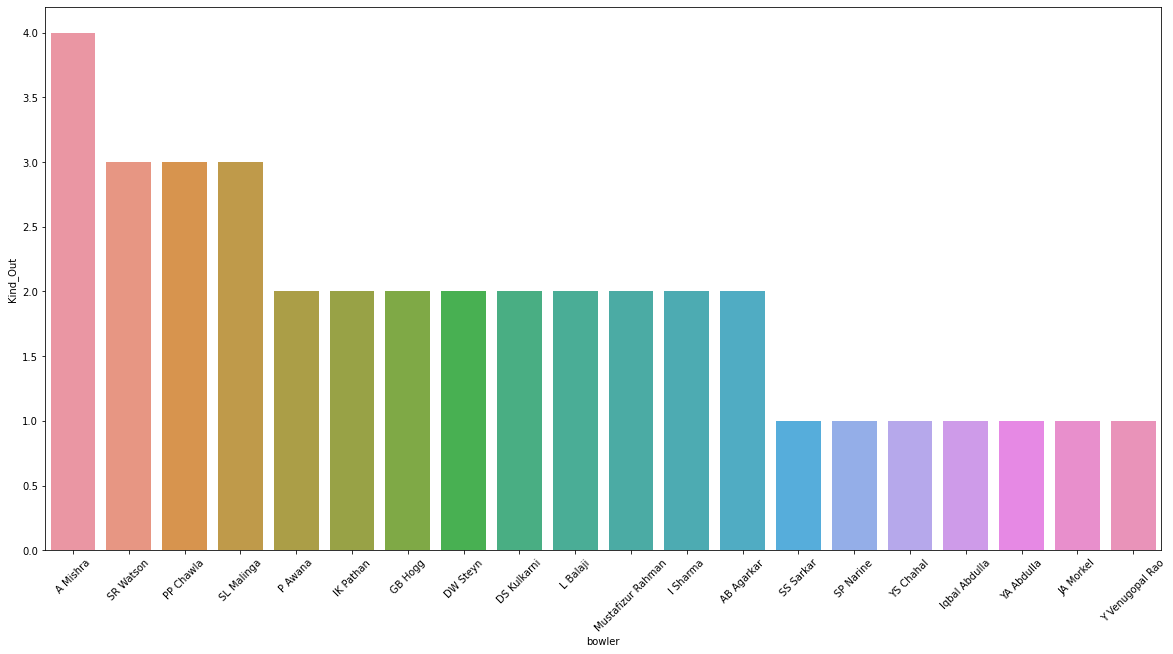

In [127]:
RA_Jadej=RA_Jadej.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=RA_Jadej['bowler'],y=RA_Jadej['Kind_Out'])
plt.xticks(rotation=45)
plt.show()

In [128]:
player = (Match_data["Striker"]=="SE Marsh")
SE_Marsh=Match_data[player]
SE_Marsh

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
2603,336008,2008,1,1,1,Kings XI Punjab,Kolkata Knight Riders,SC Ganguly,SE Marsh,JR Hopes,I Sharma,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2604,336008,2008,1,2,1,Kings XI Punjab,Kolkata Knight Riders,SC Ganguly,SE Marsh,JR Hopes,I Sharma,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2605,336008,2008,1,3,1,Kings XI Punjab,Kolkata Knight Riders,SC Ganguly,SE Marsh,JR Hopes,I Sharma,NaN,NaN,4.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2606,336008,2008,1,4,1,Kings XI Punjab,Kolkata Knight Riders,SC Ganguly,SE Marsh,JR Hopes,I Sharma,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
2607,336008,2008,1,5,1,Kings XI Punjab,Kolkata Knight Riders,SC Ganguly,SE Marsh,JR Hopes,I Sharma,NaN,NaN,0.0,NaN,NaN,NaN,"Punjab Cricket Association Stadium, Mohali"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136555,829746,2015,1,3,3,Kings XI Punjab,Rajasthan Royals,RT Ponting,SE Marsh,GJ Maxwell,CH Morris,noballs,1.0,4.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"
136556,829746,2015,1,4,3,Kings XI Punjab,Rajasthan Royals,RT Ponting,SE Marsh,GJ Maxwell,CH Morris,NaN,NaN,4.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"
136557,829746,2015,1,5,3,Kings XI Punjab,Rajasthan Royals,RT Ponting,SE Marsh,GJ Maxwell,CH Morris,NaN,NaN,4.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"
136558,829746,2015,1,6,3,Kings XI Punjab,Rajasthan Royals,RT Ponting,SE Marsh,GJ Maxwell,CH Morris,NaN,NaN,0.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"


In [129]:
Wickets_SE_Marsh= SE_Marsh.groupby(["bowler"])["Kind_Out"].count().reset_index()

In [130]:
kind_out = Wickets_SE_Marsh.sort_values(["Kind_Out"],ascending = False)

In [131]:
SE_Marsh = kind_out.head(20)

In [132]:
SE_Marsh

,bowler,Kind_Out
151,Z Khan,2
75,M Morkel,2
64,JP Duminy,2
11,AB McDonald,2
70,KK Cooper,2
20,B Kumar,2
132,SR Watson,2
129,SL Malinga,2
117,S Randiv,1
116,S Kaushik,1


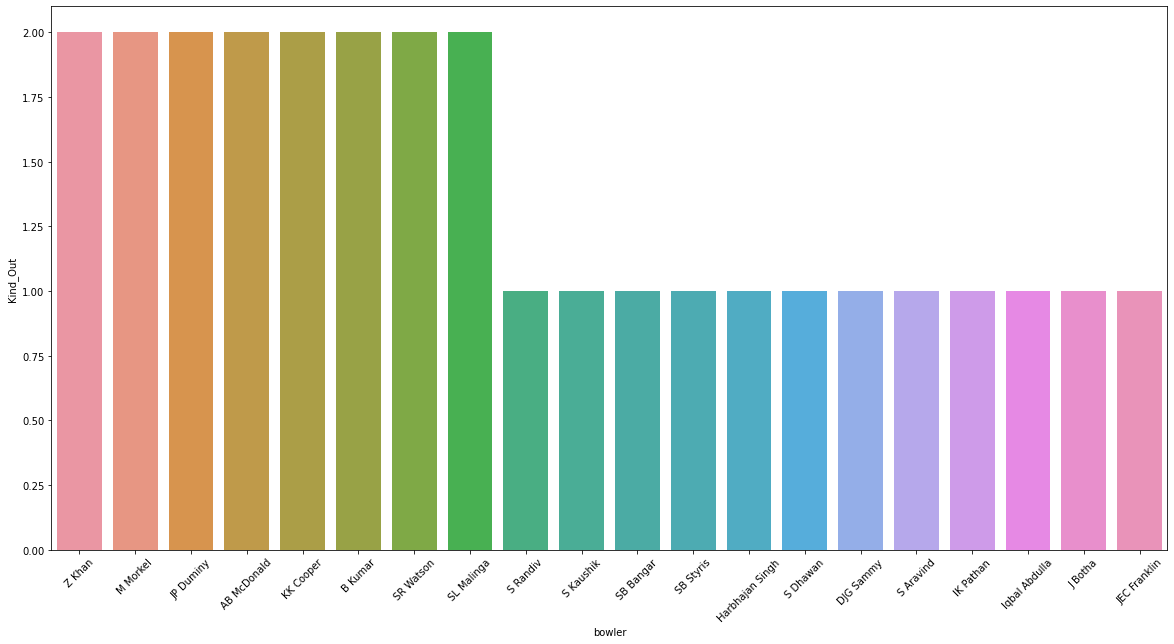

In [133]:
SE_Marsh=SE_Marsh.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=SE_Marsh['bowler'],y=SE_Marsh['Kind_Out'])
plt.xticks(rotation=45)
plt.show()

In [134]:
player = (Match_data["Striker"]=="M Vijay")
M_Vijay=Match_data[player]
M_Vijay

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
9865,392211,2009,1,1,1,Chennai Super Kings,Delhi Daredevils,SC Ganguly,M Vijay,ML Hayden,DP Nannes,wides,1.0,NaN,NaN,NaN,NaN,New Wanderers Stadium
9866,392211,2009,1,2,1,Chennai Super Kings,Delhi Daredevils,SC Ganguly,M Vijay,ML Hayden,DP Nannes,NaN,NaN,0.0,NaN,NaN,NaN,New Wanderers Stadium
9867,392211,2009,1,3,1,Chennai Super Kings,Delhi Daredevils,SC Ganguly,M Vijay,ML Hayden,DP Nannes,NaN,NaN,1.0,NaN,NaN,NaN,New Wanderers Stadium
9872,392211,2009,2,1,1,Chennai Super Kings,Delhi Daredevils,SC Ganguly,M Vijay,ML Hayden,A Nehra,NaN,NaN,0.0,NaN,NaN,NaN,New Wanderers Stadium
9873,392211,2009,2,2,1,Chennai Super Kings,Delhi Daredevils,SC Ganguly,M Vijay,ML Hayden,A Nehra,NaN,NaN,0.0,NaN,NaN,NaN,New Wanderers Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135274,981004,2016,1,6,2,Kings XI Punjab,Royal Challengers Bangalore,SC Ganguly,M Vijay,HM Amla,STR Binny,NaN,NaN,1.0,NaN,NaN,NaN,M Chinnaswamy Stadium
135275,981004,2016,2,1,2,Kings XI Punjab,Royal Challengers Bangalore,SC Ganguly,M Vijay,HM Amla,S Aravind,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
135276,981004,2016,2,2,2,Kings XI Punjab,Royal Challengers Bangalore,SC Ganguly,M Vijay,HM Amla,S Aravind,NaN,NaN,6.0,NaN,NaN,NaN,M Chinnaswamy Stadium
135277,981004,2016,2,3,2,Kings XI Punjab,Royal Challengers Bangalore,SC Ganguly,M Vijay,HM Amla,S Aravind,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [135]:
Wickets_M_Vijay= M_Vijay.groupby(["bowler"])["Kind_Out"].count().reset_index()

In [136]:
kind_out = Wickets_M_Vijay.sort_values(["Kind_Out"],ascending = False)

In [137]:
M_Vijay = kind_out.head(20)

In [138]:
M_Vijay

,bowler,Kind_Out
117,S Aravind,4
43,Harbhajan Singh,3
132,SR Watson,3
127,SK Trivedi,2
99,R Ashwin,2
75,M Muralitharan,2
82,MM Sharma,2
104,R Rampaul,2
81,MM Patel,2
79,MG Johnson,2


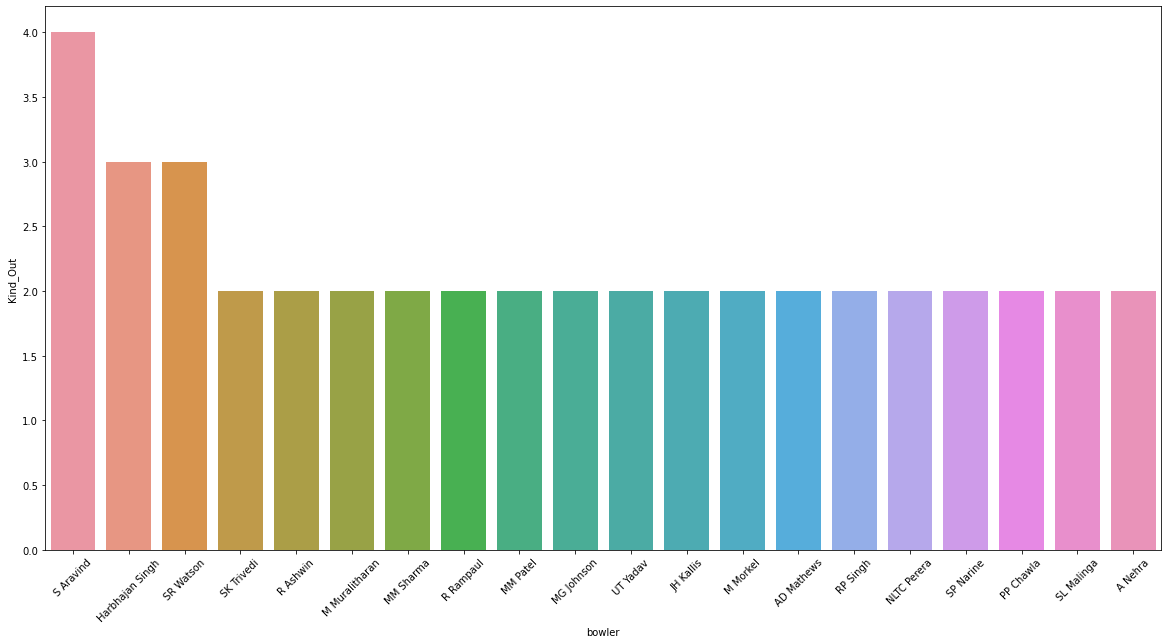

In [139]:
M_Vijay=M_Vijay.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=M_Vijay['bowler'],y=M_Vijay['Kind_Out'])
plt.xticks(rotation=45)
plt.show()

In [140]:
bat

,Striker,total_bals_played,total_runs,times_dismissal,avg_of_batsman,strike_rate
0,SK Raina,3059,4106.0,122,33.655738,134.226872
1,V Kohli,3237,4105.0,115,35.695652,126.814952
2,RG Sharma,2996,3874.0,121,32.016529,129.305741
3,G Gambhir,3028,3634.0,117,31.059829,120.013210
4,CH Gayle,2359,3447.0,81,42.555556,146.121238
5,RV Uthappa,2721,3390.0,119,28.487395,124.586549
6,DA Warner,2440,3373.0,91,37.065934,138.237705
7,MS Dhoni,2419,3270.0,92,35.543478,135.179826
8,AB de Villiers,2231,3270.0,78,41.923077,146.571044
9,S Dhawan,2622,3082.0,95,32.442105,117.543860


In [141]:
bat

,Striker,total_bals_played,total_runs,times_dismissal,avg_of_batsman,strike_rate
0,SK Raina,3059,4106.0,122,33.655738,134.226872
1,V Kohli,3237,4105.0,115,35.695652,126.814952
2,RG Sharma,2996,3874.0,121,32.016529,129.305741
3,G Gambhir,3028,3634.0,117,31.059829,120.013210
4,CH Gayle,2359,3447.0,81,42.555556,146.121238
5,RV Uthappa,2721,3390.0,119,28.487395,124.586549
6,DA Warner,2440,3373.0,91,37.065934,138.237705
7,MS Dhoni,2419,3270.0,92,35.543478,135.179826
8,AB de Villiers,2231,3270.0,78,41.923077,146.571044
9,S Dhawan,2622,3082.0,95,32.442105,117.543860


In [142]:
Match_data = pd.read_csv("IPL_Project 1.csv")

In [143]:
Match_data.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [144]:
player = (Match_data["Striker"]=="V Kohli")
V_Kohli=Match_data[player]
V_Kohli

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
1272,335997,2008,7,4,1,Royal Challengers Bangalore,Rajasthan Royals,Mohammad Hafeez,V Kohli,LRPL Taylor,SK Trivedi,NaN,NaN,2.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1273,335997,2008,7,5,1,Royal Challengers Bangalore,Rajasthan Royals,Mohammad Hafeez,V Kohli,LRPL Taylor,SK Trivedi,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1274,335997,2008,7,6,1,Royal Challengers Bangalore,Rajasthan Royals,Mohammad Hafeez,V Kohli,LRPL Taylor,SK Trivedi,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
1275,335997,2008,7,7,1,Royal Challengers Bangalore,Rajasthan Royals,Mohammad Hafeez,V Kohli,LRPL Taylor,SK Trivedi,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
1276,335997,2008,7,8,1,Royal Challengers Bangalore,Rajasthan Royals,Mohammad Hafeez,V Kohli,LRPL Taylor,SK Trivedi,NaN,NaN,1.0,NaN,NaN,NaN,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136476,981024,2016,13,3,2,Royal Challengers Bangalore,Sunrisers Hyderabad,BB McCullum,V Kohli,AB de Villiers,BB Sran,NaN,NaN,2.0,NaN,NaN,NaN,M Chinnaswamy Stadium
136477,981024,2016,13,4,2,Royal Challengers Bangalore,Sunrisers Hyderabad,BB McCullum,V Kohli,AB de Villiers,BB Sran,NaN,NaN,2.0,NaN,NaN,NaN,M Chinnaswamy Stadium
136478,981024,2016,13,5,2,Royal Challengers Bangalore,Sunrisers Hyderabad,BB McCullum,V Kohli,AB de Villiers,BB Sran,NaN,NaN,0.0,bowled,V Kohli,NaN,M Chinnaswamy Stadium
136570,598009,2013,1,3,4,Royal Challengers Bangalore,Sunrisers Hyderabad,BB McCullum,V Kohli,CH Gayle,DW Steyn,NaN,NaN,4.0,NaN,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal"


In [145]:
VK_stats = V_Kohli.groupby(["Team_Bowling"])["runs_by_batsman"].count().reset_index()

In [146]:
VK_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,559
1,Deccan Chargers,223
2,Delhi Daredevils,436
3,Gujarat Lions,120
4,Kings XI Punjab,371
5,Kochi Tuskers Kerala,51
6,Kolkata Knight Riders,319
7,Mumbai Indians,292
8,Pune Warriors,100
9,Rajasthan Royals,274


In [147]:
 VK_stats = VK_stats.sort_values(["runs_by_batsman"],ascending = False)

In [148]:
VK_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,559
2,Delhi Daredevils,436
4,Kings XI Punjab,371
6,Kolkata Knight Riders,319
11,Sunrisers Hyderabad,299
7,Mumbai Indians,292
9,Rajasthan Royals,274
1,Deccan Chargers,223
10,Rising Pune Supergiants,121
3,Gujarat Lions,120


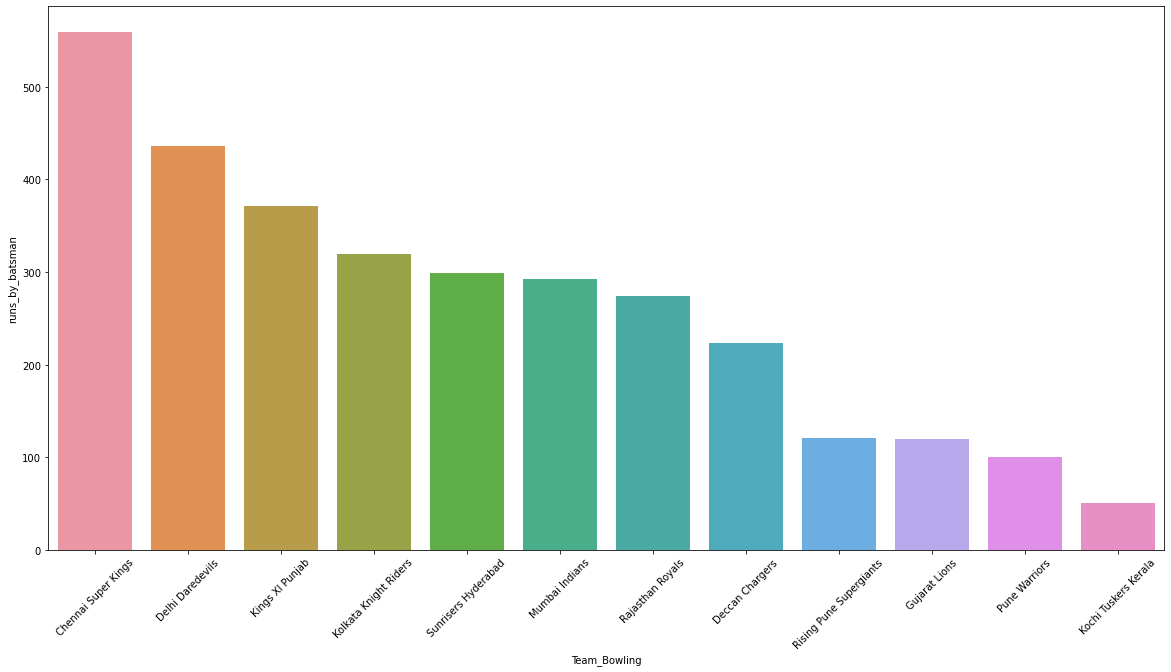

In [149]:
VK_stats=VK_stats.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=VK_stats['Team_Bowling'],y=VK_stats['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [150]:
Match_data.head()

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [151]:
df = Match_data.groupby(["Striker"])["Team_Batting"].count().reset_index()

In [152]:
Match_data

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136585,729320,2014,1,6,4,Rajasthan Royals,Kolkata Knight Riders,BB McCullum,SPD Smith,SR Watson,SP Narine,NaN,NaN,2.0,NaN,NaN,NaN,Sheikh Zayed Stadium
136586,829746,2015,1,1,4,Rajasthan Royals,Kings XI Punjab,SC Ganguly,SR Watson,JP Faulkner,MG Johnson,NaN,NaN,0.0,bowled,SR Watson,NaN,"Sardar Patel Stadium, Motera"
136587,829746,2015,1,2,4,Rajasthan Royals,Kings XI Punjab,BB McCullum,SPD Smith,JP Faulkner,MG Johnson,noballs,1.0,4.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"
136588,829746,2015,1,3,4,Rajasthan Royals,Kings XI Punjab,BB McCullum,SPD Smith,JP Faulkner,MG Johnson,NaN,NaN,1.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"


In [153]:
Match = pd.read_csv("IPL_Project 1.csv")

In [154]:
Match

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
0,335987,2008,1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,SC Ganguly,BB McCullum,P Kumar,legbyes,1.0,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
1,335987,2008,1,2,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
2,335987,2008,1,3,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,wides,1.0,NaN,NaN,NaN,NaN,M Chinnaswamy Stadium
3,335987,2008,1,4,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
4,335987,2008,1,5,1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,BB McCullum,SC Ganguly,P Kumar,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136585,729320,2014,1,6,4,Rajasthan Royals,Kolkata Knight Riders,BB McCullum,SPD Smith,SR Watson,SP Narine,NaN,NaN,2.0,NaN,NaN,NaN,Sheikh Zayed Stadium
136586,829746,2015,1,1,4,Rajasthan Royals,Kings XI Punjab,SC Ganguly,SR Watson,JP Faulkner,MG Johnson,NaN,NaN,0.0,bowled,SR Watson,NaN,"Sardar Patel Stadium, Motera"
136587,829746,2015,1,2,4,Rajasthan Royals,Kings XI Punjab,BB McCullum,SPD Smith,JP Faulkner,MG Johnson,noballs,1.0,4.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"
136588,829746,2015,1,3,4,Rajasthan Royals,Kings XI Punjab,BB McCullum,SPD Smith,JP Faulkner,MG Johnson,NaN,NaN,1.0,NaN,NaN,NaN,"Sardar Patel Stadium, Motera"


In [155]:
player = (Match["Striker"]=="AB de Villiers")
AB_de_Villiers=Match[player]
AB_de_Villiers

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
3349,336014,2008,6,2,1,Delhi Daredevils,Chennai Super Kings,RT Ponting,AB de Villiers,G Gambhir,JA Morkel,NaN,NaN,0.0,bowled,AB de Villiers,NaN,Feroz Shah Kotla
4075,336020,2008,8,1,1,Delhi Daredevils,Rajasthan Royals,DJ Hussey,AB de Villiers,G Gambhir,SK Trivedi,NaN,NaN,1.0,NaN,NaN,NaN,Sawai Mansingh Stadium
4077,336020,2008,8,3,1,Delhi Daredevils,Rajasthan Royals,DJ Hussey,AB de Villiers,G Gambhir,SK Trivedi,NaN,NaN,2.0,NaN,NaN,NaN,Sawai Mansingh Stadium
4078,336020,2008,8,4,1,Delhi Daredevils,Rajasthan Royals,DJ Hussey,AB de Villiers,G Gambhir,SK Trivedi,NaN,NaN,0.0,NaN,NaN,NaN,Sawai Mansingh Stadium
4079,336020,2008,8,5,1,Delhi Daredevils,Rajasthan Royals,DJ Hussey,AB de Villiers,G Gambhir,SK Trivedi,NaN,NaN,2.0,NaN,NaN,NaN,Sawai Mansingh Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136484,981024,2016,14,5,2,Royal Challengers Bangalore,Sunrisers Hyderabad,RT Ponting,AB de Villiers,KL Rahul,Bipul Sharma,NaN,NaN,0.0,caught,AB de Villiers,MC Henriques,M Chinnaswamy Stadium
136542,598022,2013,1,2,3,Royal Challengers Bangalore,Delhi Daredevils,BB McCullum,AB de Villiers,CH Gayle,UT Yadav,NaN,NaN,1.0,NaN,NaN,NaN,M Chinnaswamy Stadium
136544,598022,2013,1,4,3,Royal Challengers Bangalore,Delhi Daredevils,BB McCullum,AB de Villiers,CH Gayle,UT Yadav,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
136545,598022,2013,1,5,3,Royal Challengers Bangalore,Delhi Daredevils,BB McCullum,AB de Villiers,CH Gayle,UT Yadav,NaN,NaN,6.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [156]:
AB_stats = AB_de_Villiers.groupby(["Team_Bowling"])["runs_by_batsman"].count().reset_index()

In [157]:
AB_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,235
1,Deccan Chargers,127
2,Delhi Daredevils,160
3,Gujarat Lions,115
4,Kings XI Punjab,251
5,Kochi Tuskers Kerala,40
6,Kolkata Knight Riders,191
7,Mumbai Indians,314
8,Pune Warriors,69
9,Rajasthan Royals,346


In [158]:
 AB_stats = AB_stats.sort_values(["runs_by_batsman"],ascending = False)

In [159]:
AB_stats

,Team_Bowling,runs_by_batsman
9,Rajasthan Royals,346
7,Mumbai Indians,314
4,Kings XI Punjab,251
0,Chennai Super Kings,235
6,Kolkata Knight Riders,191
12,Sunrisers Hyderabad,182
2,Delhi Daredevils,160
1,Deccan Chargers,127
3,Gujarat Lions,115
11,Royal Challengers Bangalore,112


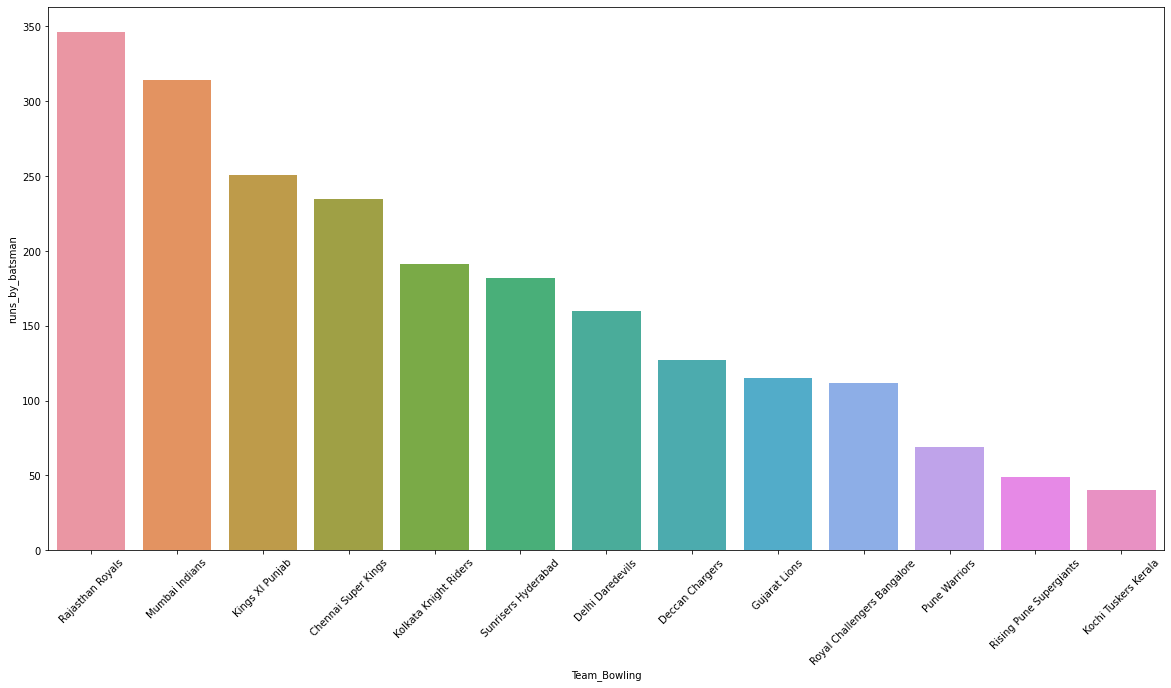

In [185]:
AB_stats=AB_stats.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=AB_stats['Team_Bowling'],y=AB_stats['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [160]:
player = (Match["Striker"]=="CH Gayle")
CH_Gayle=Match[player]
CH_Gayle

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
7385,392189,2009,1,3,1,Kolkata Knight Riders,Deccan Chargers,BB McCullum,CH Gayle,BB McCullum,FH Edwards,NaN,NaN,0.0,NaN,NaN,NaN,Newlands
7386,392189,2009,1,4,1,Kolkata Knight Riders,Deccan Chargers,BB McCullum,CH Gayle,BB McCullum,FH Edwards,NaN,NaN,0.0,NaN,NaN,NaN,Newlands
7387,392189,2009,1,5,1,Kolkata Knight Riders,Deccan Chargers,BB McCullum,CH Gayle,BB McCullum,FH Edwards,NaN,NaN,0.0,NaN,NaN,NaN,Newlands
7388,392189,2009,1,6,1,Kolkata Knight Riders,Deccan Chargers,BB McCullum,CH Gayle,BB McCullum,FH Edwards,NaN,NaN,0.0,NaN,NaN,NaN,Newlands
7391,392189,2009,2,3,1,Kolkata Knight Riders,Deccan Chargers,BB McCullum,CH Gayle,SC Ganguly,RP Singh,NaN,NaN,0.0,NaN,NaN,NaN,Newlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136543,598022,2013,1,3,3,Royal Challengers Bangalore,Delhi Daredevils,SC Ganguly,CH Gayle,AB de Villiers,UT Yadav,NaN,NaN,1.0,NaN,NaN,NaN,M Chinnaswamy Stadium
136568,598009,2013,1,1,4,Royal Challengers Bangalore,Sunrisers Hyderabad,SC Ganguly,CH Gayle,V Kohli,DW Steyn,NaN,NaN,2.0,NaN,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal"
136569,598009,2013,1,2,4,Royal Challengers Bangalore,Sunrisers Hyderabad,SC Ganguly,CH Gayle,V Kohli,DW Steyn,NaN,NaN,1.0,NaN,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal"
136572,598009,2013,1,5,4,Royal Challengers Bangalore,Sunrisers Hyderabad,SC Ganguly,CH Gayle,V Kohli,DW Steyn,NaN,NaN,6.0,NaN,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal"


In [161]:
Gayle_stats = CH_Gayle.groupby(["Team_Bowling"])["runs_by_batsman"].count().reset_index()

In [162]:
Gayle_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,223
1,Deccan Chargers,52
2,Delhi Daredevils,212
3,Gujarat Lions,25
4,Kings XI Punjab,461
5,Kochi Tuskers Kerala,16
6,Kolkata Knight Riders,341
7,Mumbai Indians,335
8,Pune Warriors,194
9,Rajasthan Royals,238


In [163]:
 Gayle_stats = Gayle_stats.sort_values(["runs_by_batsman"],ascending = False)

In [164]:
Gayle_stats

,Team_Bowling,runs_by_batsman
4,Kings XI Punjab,461
6,Kolkata Knight Riders,341
7,Mumbai Indians,335
9,Rajasthan Royals,238
0,Chennai Super Kings,223
2,Delhi Daredevils,212
8,Pune Warriors,194
11,Sunrisers Hyderabad,128
1,Deccan Chargers,52
10,Royal Challengers Bangalore,52


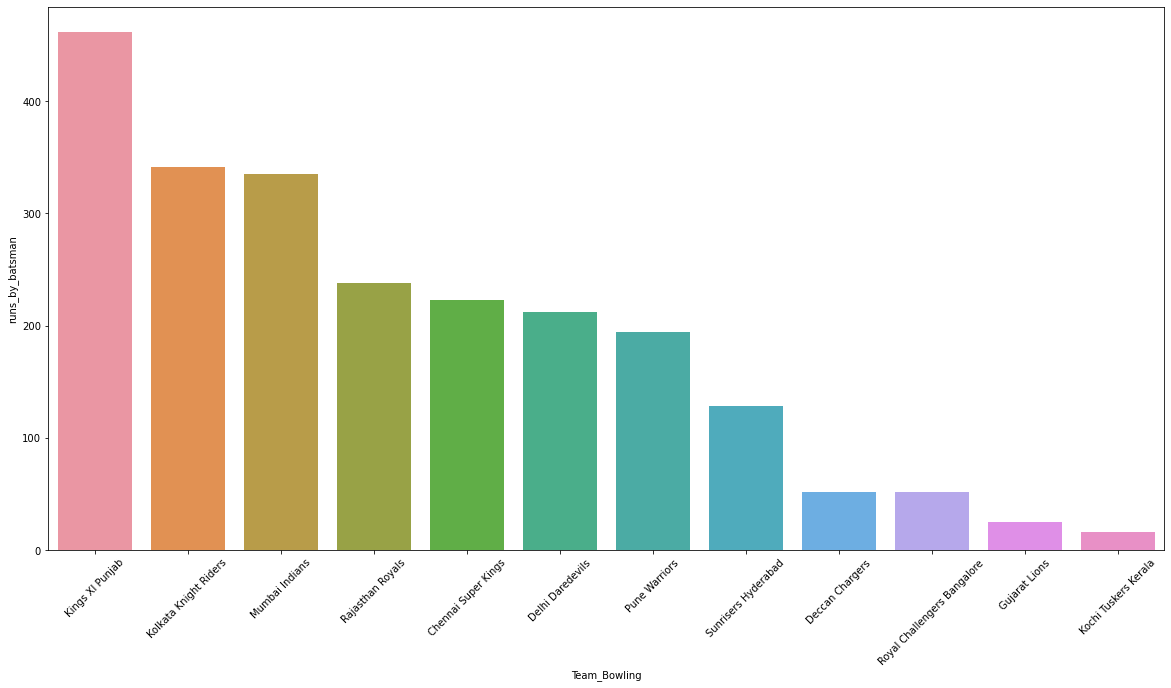

In [186]:
Gayle_stats=Gayle_stats.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=Gayle_stats['Team_Bowling'],y=Gayle_stats['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [165]:
player = (Match["Striker"]=="DA Warner")
DA_Warner=Match[player]
DA_Warner

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
11972,392228,2009,1,3,1,Delhi Daredevils,Deccan Chargers,BB McCullum,DA Warner,G Gambhir,RP Singh,NaN,NaN,0.0,NaN,NaN,NaN,Kingsmead
11973,392228,2009,1,4,1,Delhi Daredevils,Deccan Chargers,BB McCullum,DA Warner,G Gambhir,RP Singh,wides,1.0,NaN,NaN,NaN,NaN,Kingsmead
11974,392228,2009,1,5,1,Delhi Daredevils,Deccan Chargers,BB McCullum,DA Warner,G Gambhir,RP Singh,NaN,NaN,1.0,NaN,NaN,NaN,Kingsmead
11976,392228,2009,1,7,1,Delhi Daredevils,Deccan Chargers,BB McCullum,DA Warner,G Gambhir,RP Singh,NaN,NaN,1.0,NaN,NaN,NaN,Kingsmead
11977,392228,2009,2,1,1,Delhi Daredevils,Deccan Chargers,BB McCullum,DA Warner,G Gambhir,WPUJC Vaas,NaN,NaN,2.0,NaN,NaN,NaN,Kingsmead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136393,981022,2016,19,4,2,Sunrisers Hyderabad,Gujarat Lions,SC Ganguly,DA Warner,Bipul Sharma,DJ Bravo,NaN,NaN,4.0,NaN,NaN,NaN,Feroz Shah Kotla
136394,981022,2016,19,5,2,Sunrisers Hyderabad,Gujarat Lions,SC Ganguly,DA Warner,Bipul Sharma,DJ Bravo,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla
136396,981022,2016,20,1,2,Sunrisers Hyderabad,Gujarat Lions,SC Ganguly,DA Warner,Bipul Sharma,P Kumar,NaN,NaN,4.0,NaN,NaN,NaN,Feroz Shah Kotla
136397,981022,2016,20,2,2,Sunrisers Hyderabad,Gujarat Lions,SC Ganguly,DA Warner,Bipul Sharma,P Kumar,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla


In [166]:
Warner_stats = DA_Warner.groupby(["Team_Bowling"])["runs_by_batsman"].count().reset_index()

In [167]:
Warner_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,249
1,Deccan Chargers,147
2,Delhi Daredevils,175
3,Gujarat Lions,123
4,Kings XI Punjab,380
5,Kochi Tuskers Kerala,22
6,Kolkata Knight Riders,348
7,Mumbai Indians,289
8,Pune Warriors,68
9,Rajasthan Royals,202


In [168]:
 Warner_stats = Warner_stats.sort_values(["runs_by_batsman"],ascending = False)

In [169]:
Warner_stats

,Team_Bowling,runs_by_batsman
4,Kings XI Punjab,380
6,Kolkata Knight Riders,348
11,Royal Challengers Bangalore,344
7,Mumbai Indians,289
0,Chennai Super Kings,249
9,Rajasthan Royals,202
2,Delhi Daredevils,175
1,Deccan Chargers,147
3,Gujarat Lions,123
8,Pune Warriors,68


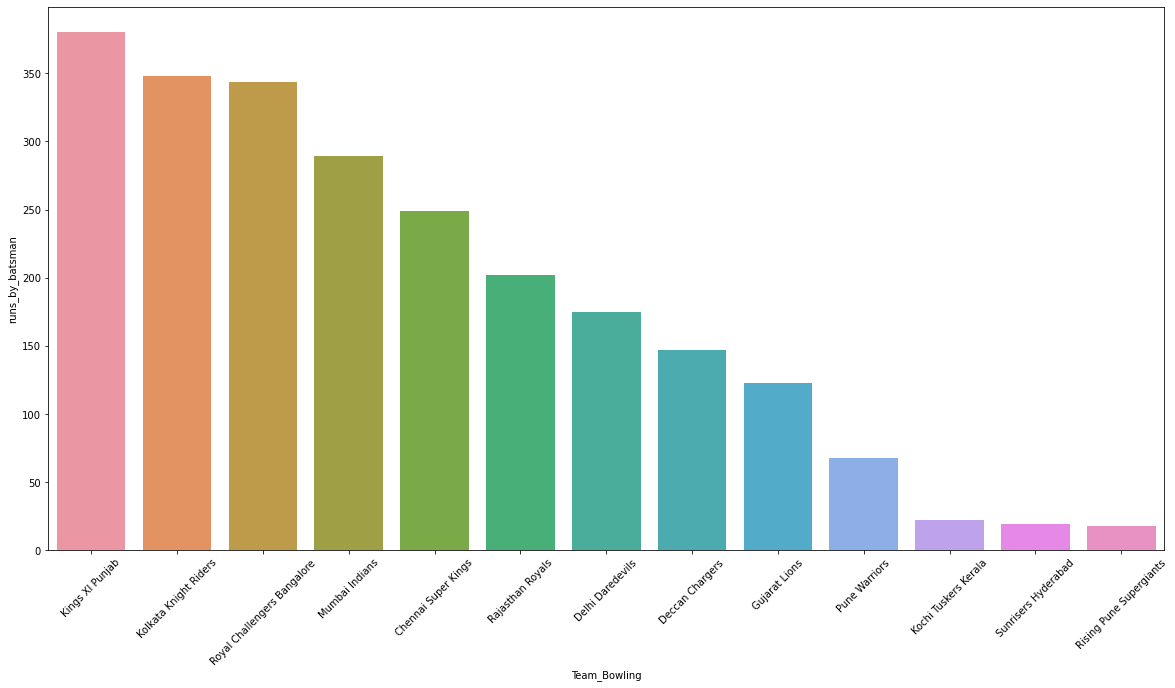

In [187]:
Warner_stats=Warner_stats.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=Warner_stats['Team_Bowling'],y=Warner_stats['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [170]:
player = (Match["Striker"]=="YK Pathan")
YK_Pathan=Match[player]
YK_Pathan

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
255,335989,2008,2,1,1,Rajasthan Royals,Delhi Daredevils,BB McCullum,YK Pathan,T Kohli,B Geeves,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla
259,335989,2008,2,5,1,Rajasthan Royals,Delhi Daredevils,BB McCullum,YK Pathan,T Kohli,B Geeves,NaN,NaN,4.0,NaN,NaN,NaN,Feroz Shah Kotla
260,335989,2008,2,6,1,Rajasthan Royals,Delhi Daredevils,BB McCullum,YK Pathan,T Kohli,B Geeves,NaN,NaN,4.0,NaN,NaN,NaN,Feroz Shah Kotla
267,335989,2008,4,1,1,Rajasthan Royals,Delhi Daredevils,BB McCullum,YK Pathan,SR Watson,B Geeves,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla
271,335989,2008,4,5,1,Rajasthan Royals,Delhi Daredevils,BB McCullum,YK Pathan,SR Watson,B Geeves,NaN,NaN,0.0,run out,YK Pathan,M Manhas,Feroz Shah Kotla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136225,981020,2016,11,5,2,Kolkata Knight Riders,Sunrisers Hyderabad,Mohammad Hafeez,YK Pathan,MK Pandey,MC Henriques,NaN,NaN,0.0,caught,YK Pathan,B Kumar,Feroz Shah Kotla
136560,392195,2009,1,1,4,Rajasthan Royals,Kolkata Knight Riders,SC Ganguly,YK Pathan,AD Mascarenhas,BAW Mendis,NaN,NaN,6.0,NaN,NaN,NaN,Newlands
136561,392195,2009,1,2,4,Rajasthan Royals,Kolkata Knight Riders,SC Ganguly,YK Pathan,AD Mascarenhas,BAW Mendis,NaN,NaN,2.0,NaN,NaN,NaN,Newlands
136562,392195,2009,1,3,4,Rajasthan Royals,Kolkata Knight Riders,SC Ganguly,YK Pathan,AD Mascarenhas,BAW Mendis,NaN,NaN,6.0,NaN,NaN,NaN,Newlands


In [171]:
Pathan_stats = YK_Pathan.groupby(["Team_Bowling"])["runs_by_batsman"].count().reset_index()

In [172]:
Pathan_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,177
1,Deccan Chargers,173
2,Delhi Daredevils,241
3,Gujarat Lions,77
4,Kings XI Punjab,204
5,Kochi Tuskers Kerala,16
6,Kolkata Knight Riders,114
7,Mumbai Indians,264
8,Pune Warriors,101
9,Rajasthan Royals,106


In [173]:
 Pathan_stats = Pathan_stats.sort_values(["runs_by_batsman"],ascending = False)

In [174]:
Pathan_stats

,Team_Bowling,runs_by_batsman
7,Mumbai Indians,264
2,Delhi Daredevils,241
11,Royal Challengers Bangalore,232
4,Kings XI Punjab,204
0,Chennai Super Kings,177
1,Deccan Chargers,173
12,Sunrisers Hyderabad,148
6,Kolkata Knight Riders,114
9,Rajasthan Royals,106
8,Pune Warriors,101


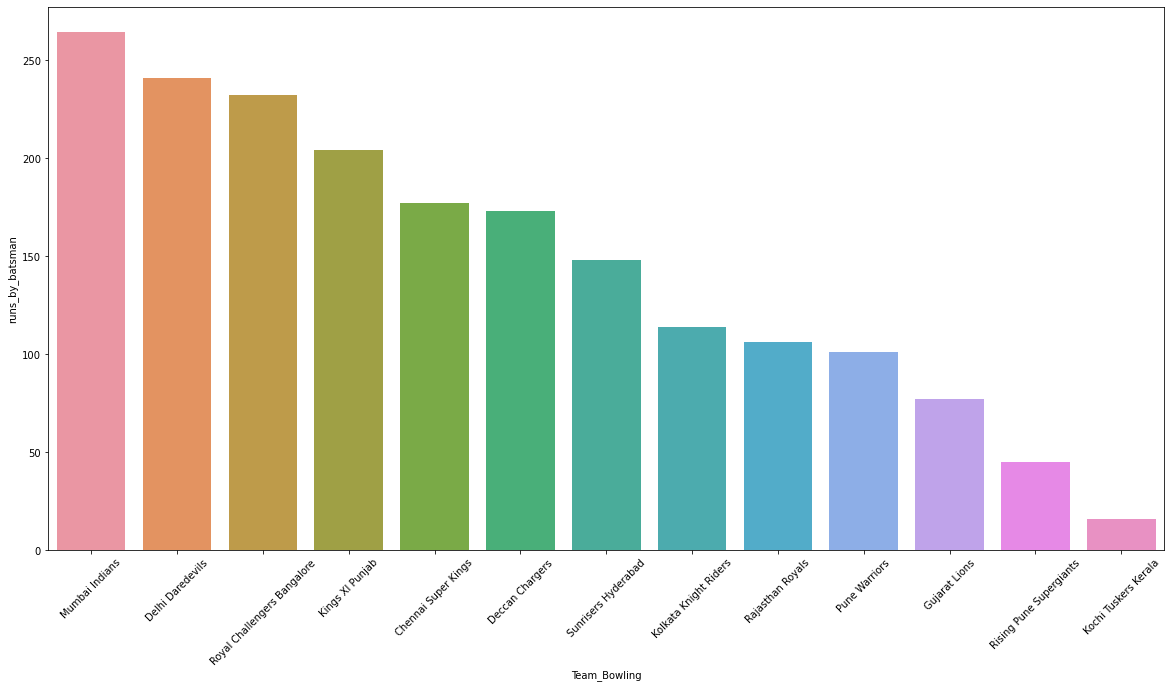

In [188]:
Pathan_stats=Pathan_stats.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=Pathan_stats['Team_Bowling'],y=Pathan_stats['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [175]:
player = (Match["Striker"]=="Yuvraj Singh")
Yuvraj_Singh=Match[player]
Yuvraj_Singh

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
657,335992,2008,8,5,1,Kings XI Punjab,Rajasthan Royals,Mohammad Hafeez,Yuvraj Singh,JR Hopes,D Salunkhe,NaN,NaN,4.0,NaN,NaN,NaN,Sawai Mansingh Stadium
658,335992,2008,8,6,1,Kings XI Punjab,Rajasthan Royals,Mohammad Hafeez,Yuvraj Singh,JR Hopes,D Salunkhe,wides,1.0,NaN,NaN,NaN,NaN,Sawai Mansingh Stadium
659,335992,2008,8,7,1,Kings XI Punjab,Rajasthan Royals,Mohammad Hafeez,Yuvraj Singh,JR Hopes,D Salunkhe,legbyes,1.0,0.0,NaN,NaN,NaN,Sawai Mansingh Stadium
660,335992,2008,9,1,1,Kings XI Punjab,Rajasthan Royals,Mohammad Hafeez,Yuvraj Singh,JR Hopes,SK Warne,NaN,NaN,1.0,NaN,NaN,NaN,Sawai Mansingh Stadium
663,335992,2008,9,4,1,Kings XI Punjab,Rajasthan Royals,Mohammad Hafeez,Yuvraj Singh,JR Hopes,SK Warne,NaN,NaN,1.0,NaN,NaN,NaN,Sawai Mansingh Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136327,981022,2016,8,4,2,Sunrisers Hyderabad,Gujarat Lions,DJ Hussey,Yuvraj Singh,DA Warner,SK Raina,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla
136330,981022,2016,9,1,2,Sunrisers Hyderabad,Gujarat Lions,DJ Hussey,Yuvraj Singh,DA Warner,S Kaushik,NaN,NaN,0.0,NaN,NaN,NaN,Feroz Shah Kotla
136331,981022,2016,9,2,2,Sunrisers Hyderabad,Gujarat Lions,DJ Hussey,Yuvraj Singh,DA Warner,S Kaushik,NaN,NaN,0.0,caught,Yuvraj Singh,DR Smith,Feroz Shah Kotla
136566,419126,2010,1,3,4,Kings XI Punjab,Chennai Super Kings,BB McCullum,Yuvraj Singh,IK Pathan,M Muralitharan,NaN,NaN,0.0,NaN,NaN,NaN,"MA Chidambaram Stadium, Chepauk"


In [176]:
UV_stats = Yuvraj_Singh.groupby(["Team_Bowling"])["runs_by_batsman"].count().reset_index()

In [177]:
UV_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,272
1,Deccan Chargers,104
2,Delhi Daredevils,249
3,Gujarat Lions,27
4,Kings XI Punjab,161
5,Kochi Tuskers Kerala,12
6,Kolkata Knight Riders,262
7,Mumbai Indians,216
8,Rajasthan Royals,244
9,Rising Pune Supergiants,21


In [178]:
 UV_stats = UV_stats.sort_values(["runs_by_batsman"],ascending = False)

In [179]:
UV_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,272
6,Kolkata Knight Riders,262
2,Delhi Daredevils,249
8,Rajasthan Royals,244
7,Mumbai Indians,216
10,Royal Challengers Bangalore,164
4,Kings XI Punjab,161
1,Deccan Chargers,104
11,Sunrisers Hyderabad,66
3,Gujarat Lions,27


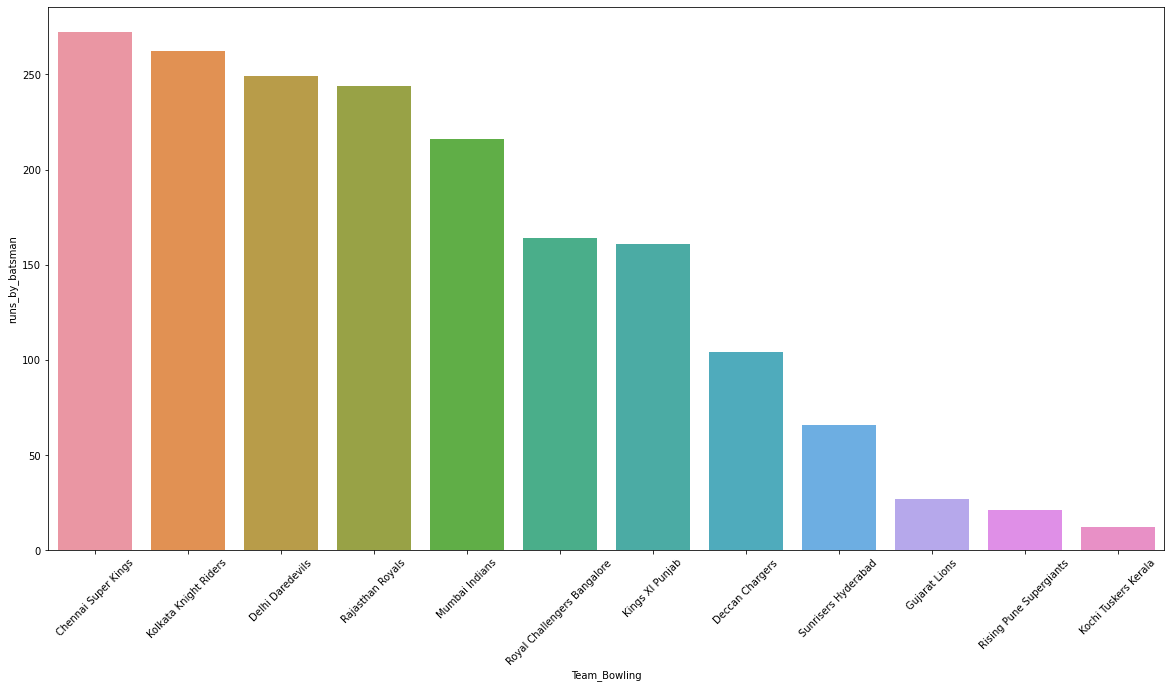

In [189]:
UV_stats=UV_stats.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=UV_stats['Team_Bowling'],y=UV_stats['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()

In [180]:
player = (Match["Striker"]=="KA Pollard")
KA_Pollard=Match[player]
KA_Pollard

,Match_Id,season,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,bowler,extrasby,Extra_Runs,runs_by_batsman,Kind_Out,Player_Out,Fielders,Venue_Name
15208,419119,2010,18,7,1,Mumbai Indians,Delhi Daredevils,R Dravid,KA Pollard,SS Tiwary,MF Maharoof,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla
15209,419119,2010,19,1,1,Mumbai Indians,Delhi Daredevils,R Dravid,KA Pollard,SS Tiwary,DP Nannes,noballs,1.0,0.0,NaN,NaN,NaN,Feroz Shah Kotla
15210,419119,2010,19,2,1,Mumbai Indians,Delhi Daredevils,R Dravid,KA Pollard,SS Tiwary,DP Nannes,NaN,NaN,4.0,NaN,NaN,NaN,Feroz Shah Kotla
15211,419119,2010,19,3,1,Mumbai Indians,Delhi Daredevils,R Dravid,KA Pollard,SS Tiwary,DP Nannes,NaN,NaN,1.0,NaN,NaN,NaN,Feroz Shah Kotla
15214,419119,2010,19,6,1,Mumbai Indians,Delhi Daredevils,R Dravid,KA Pollard,SS Tiwary,DP Nannes,NaN,NaN,0.0,run out,SS Tiwary,KD Karthik,Feroz Shah Kotla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134460,980986,2016,17,8,2,Mumbai Indians,Royal Challengers Bangalore,Mohammad Hafeez,KA Pollard,JC Buttler,SR Watson,NaN,NaN,0.0,NaN,NaN,NaN,M Chinnaswamy Stadium
134462,980986,2016,18,2,2,Mumbai Indians,Royal Challengers Bangalore,Mohammad Hafeez,KA Pollard,JC Buttler,CJ Jordan,NaN,NaN,1.0,NaN,NaN,NaN,M Chinnaswamy Stadium
134464,980986,2016,18,4,2,Mumbai Indians,Royal Challengers Bangalore,Mohammad Hafeez,KA Pollard,JC Buttler,CJ Jordan,NaN,NaN,1.0,NaN,NaN,NaN,M Chinnaswamy Stadium
134467,980986,2016,19,1,2,Mumbai Indians,Royal Challengers Bangalore,Mohammad Hafeez,KA Pollard,JC Buttler,VR Aaron,NaN,NaN,1.0,NaN,NaN,NaN,M Chinnaswamy Stadium


In [181]:
Pollard_stats = KA_Pollard.groupby(["Team_Bowling"])["runs_by_batsman"].count().reset_index()

In [182]:
Pollard_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,227
1,Deccan Chargers,47
2,Delhi Daredevils,144
3,Gujarat Lions,14
4,Kings XI Punjab,184
5,Kolkata Knight Riders,142
6,Pune Warriors,47
7,Rajasthan Royals,169
8,Rising Pune Supergiants,8
9,Royal Challengers Bangalore,211


In [183]:
 Pollard_stats = Pollard_stats.sort_values(["runs_by_batsman"],ascending = False)

In [184]:
Pollard_stats

,Team_Bowling,runs_by_batsman
0,Chennai Super Kings,227
9,Royal Challengers Bangalore,211
4,Kings XI Punjab,184
7,Rajasthan Royals,169
2,Delhi Daredevils,144
5,Kolkata Knight Riders,142
10,Sunrisers Hyderabad,138
1,Deccan Chargers,47
6,Pune Warriors,47
3,Gujarat Lions,14


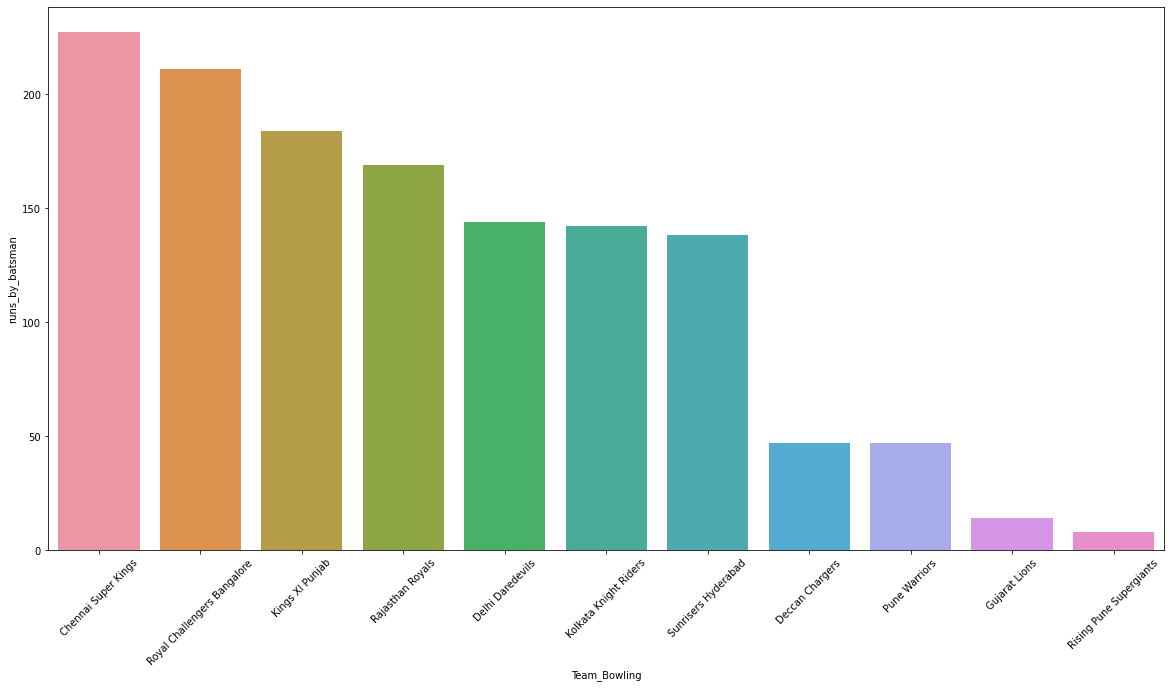

In [190]:
Pollard_stats=Pollard_stats.head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=Pollard_stats['Team_Bowling'],y=Pollard_stats['runs_by_batsman'])
plt.xticks(rotation=45)
plt.show()